# Travel Package Purchase Prediction

**Problem Statement:**

Tourism is one of the most rapidly growing global industries and tourism forecasting is
becoming an increasingly important activity in planning and managing the industry.
Because of high fluctuations of tourism demand, accurate predictions of purchase of
travel packages are of high importance for tourism organizations.
The goal is to predict whether the customer will purchase the travel or not.

**Objective:**

To predict the possibility that the customers will purchase the travel package or not

**Approach:**
    
* We will be performing tasks like Data Exploration, Data Cleaning,Feature Engineering, Model Building and Model Testing. 

* We will try out different machinelearning algorithms that’s best fit for the above case.

# Data Exploration & Cleaning

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn import tree
import scipy.stats as stats


# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_excel("C:\\Users\\sonal\\Downloads\\6129343_1_tourism-data.xlsx","Tourism")

In [3]:
df

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0         200000          1  41.0     Self Enquiry         3              6.0   
1         200001          0  49.0  Company Invited         1             14.0   
2         200002          1  37.0     Self Enquiry         1              8.0   
3         200003          0  33.0  Company Invited         1              9.0   
4         200004          0   NaN     Self Enquiry         1              8.0   
...          ...        ...   ...              ...       ...              ...   
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisited  NumberOfFollowups  \
0           Salaried  Female                      3                3.0   
1           Salaried    Male                      3                4.0   
2        Free Lancer    Male                      3                4.0   
3           Salaried  Female                      2                3.0   
4     Small Business    Male                      2                3.0   
...              ...     ...                    ...                ...   
4883  Small Business    Male                      3                5.0   
4884        Salaried    Male                      4                5.0   
4885        Salaried  Female                      4                4.0   
4886  Small Business    Male                      3                4.0   
4887        Salaried    Male                      4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0            Deluxe                    3.0        Single            1.0   
1            Deluxe                    4.0      Divorced            2.0   
2             Basic                    3.0        Single            7.0   
3             Basic                    3.0      Divorced            2.0   
4             Basic                    4.0      Divorced            1.0   
...             ...                    ...           ...            ...   
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
0            1                       2       1                      0.0   
1            0                       3       1                      2.0   
2            1                       3       0                      0.0   
3            1                       5       1                      1.0   
4            0                       5       1                      0.0   
...        ...                     ...     ...                      ...   
4883         1                       1       1                      1.0   
4884         1                       3       1                      2.0   
4885         0                       1       1                      3.0   
4886         0                       5       0                      2.0   
4887         1                       3       1                      2.0   

         Designation  MonthlyIncome  
0            Manager        20993.0  
1            Manager        20130.0  
2          Executive        17090.0  
3          Executive        17909.0  
4          Executive        18468.0  
...              ...            ...  
4883         Manager        26576.0  
4884       Executive        21212.0  


In [4]:
df['ProdTaken'].unique()

array([1, 0], dtype=int64)

In [5]:
df.shape

(4888, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

**Data Cleaning**

In [7]:
df.duplicated().sum()

0

**There are no duplicates in our dataset**

In [8]:
df.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [9]:
#dropping rows from "TypeofContact" having null or missing values
df = df.dropna(subset=['TypeofContact'], how='all')

In [10]:
df.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact                0
CityTier                     0
DurationOfPitch            226
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              208
dtype: int64

In [11]:
df.shape

(4863, 20)

**Fill NaN Values in Multiple Columns with Median**

In [12]:
df[['Age', 'DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisited',
    'MonthlyIncome']] = df[['Age', 'DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisited',
    'MonthlyIncome']].fillna(df[['Age', 'DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips',
                                 'NumberOfChildrenVisited','MonthlyIncome']].median())

In [13]:
df.isna().sum()

CustomerID                 0
ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

**We have successfully replaced NaN values with their respective median**

In [ ]:
#df.to_excel('Tourism-filtered.csv')
df.to_excel(r'C:\\Users\\sonal\\OneDrive\\Desktop\\Tourism-filtered.xlsx', index=False)

In [15]:
df.describe().T

count           mean          std       min  \
CustomerID               4863.0  202449.423196  1411.628431  200000.0   
ProdTaken                4863.0       0.188567     0.391204       0.0   
Age                      4863.0      37.585647     9.104766      18.0   
CityTier                 4863.0       1.654329     0.916498       1.0   
DurationOfPitch          4863.0      15.375077     8.335788       5.0   
NumberOfPersonVisited    4863.0       2.908081     0.724762       1.0   
NumberOfFollowups        4863.0       3.713346     0.996539       1.0   
PreferredPropertyStar    4863.0       3.578655     0.796907       3.0   
NumberOfTrips            4863.0       3.231339     1.822589       1.0   
Passport                 4863.0       0.292412     0.454917       0.0   
PitchSatisfactionScore   4863.0       3.079581     1.366446       1.0   
OwnCar                   4863.0       0.620605     0.485286       0.0   
NumberOfChildrenVisited  4863.0       1.187744     0.852271       0.0   
MonthlyIncome            4863.0   23565.411063  5270.642955    1000.0   

                              25%       50%       75%       max  
CustomerID               201229.5  202456.0  203671.5  204887.0  
ProdTaken                     0.0       0.0       0.0       1.0  
Age                          31.0      36.0      43.0      61.0  
CityTier                      1.0       1.0       3.0       3.0  
DurationOfPitch               9.0      13.0      19.0     127.0  
NumberOfPersonVisited         2.0       3.0       3.0       5.0  
NumberOfFollowups             3.0       4.0       4.0       6.0  
PreferredPropertyStar         3.0       3.0       4.0       5.0  
NumberOfTrips                 2.0       3.0       4.0      22.0  
Passport                      0.0       0.0       1.0       1.0  
PitchSatisfactionScore        2.0       3.0       4.0       5.0  
OwnCar                        0.0       1.0       1.0       1.0  
NumberOfChildrenVisited       1.0       1.0       2.0       3.0  
MonthlyIncome             20479.0   22347.0   25447.5   98678.0

In [16]:
#Dropping CustomerID column
df = df.drop("CustomerID",axis=1)

In [17]:
#Lets check the Catagorical and Numerical column data in our dataset
cat_col=[fea for fea in df.columns if df[fea].dtype == 'O'] #catagorical data
num_col=[fea for fea in df.columns if df[fea].dtype != 'O']  #numarical data

In [18]:
df[cat_col].head()

TypeofContact      Occupation  Gender ProductPitched MaritalStatus  \
0     Self Enquiry        Salaried  Female         Deluxe        Single   
1  Company Invited        Salaried    Male         Deluxe      Divorced   
2     Self Enquiry     Free Lancer    Male          Basic        Single   
3  Company Invited        Salaried  Female          Basic      Divorced   
4     Self Enquiry  Small Business    Male          Basic      Divorced   

  Designation  
0     Manager  
1     Manager  
2   Executive  
3   Executive  
4   Executive

In [19]:
df[num_col].head()

ProdTaken   Age  CityTier  DurationOfPitch  NumberOfPersonVisited  \
0          1  41.0         3              6.0                      3   
1          0  49.0         1             14.0                      3   
2          1  37.0         1              8.0                      3   
3          0  33.0         1              9.0                      2   
4          0  36.0         1              8.0                      2   

   NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  \
0                3.0                    3.0            1.0         1   
1                4.0                    4.0            2.0         0   
2                4.0                    3.0            7.0         1   
3                3.0                    3.0            2.0         1   
4                3.0                    4.0            1.0         0   

   PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  MonthlyIncome  
0                       2       1                      0.0        20993.0  
1                       3       1                      2.0        20130.0  
2                       3       0                      0.0        17090.0  
3                       5       1                      1.0        17909.0  
4                       5       1                      0.0        18468.0

# Univariate Data Visualizations

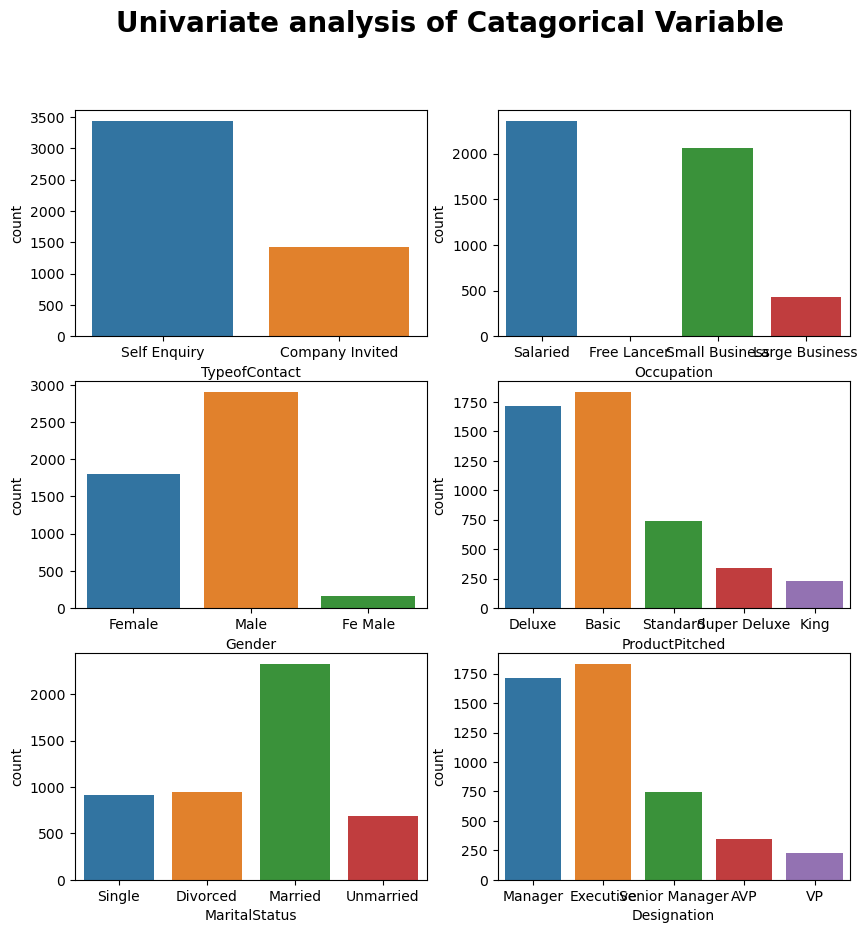

In [20]:
plt.figure(figsize=(10,10))
plt.suptitle('Univariate analysis of Catagorical Variable', fontsize=20, fontweight='bold')
cat_col=[fea for fea in df.columns if df[fea].dtype == 'O']

for i in range (0, len(cat_col)):
    plt.subplot(3,2,i+1)
    sns.countplot(df[cat_col[i]])
    plt.xlabel(cat_col[i])

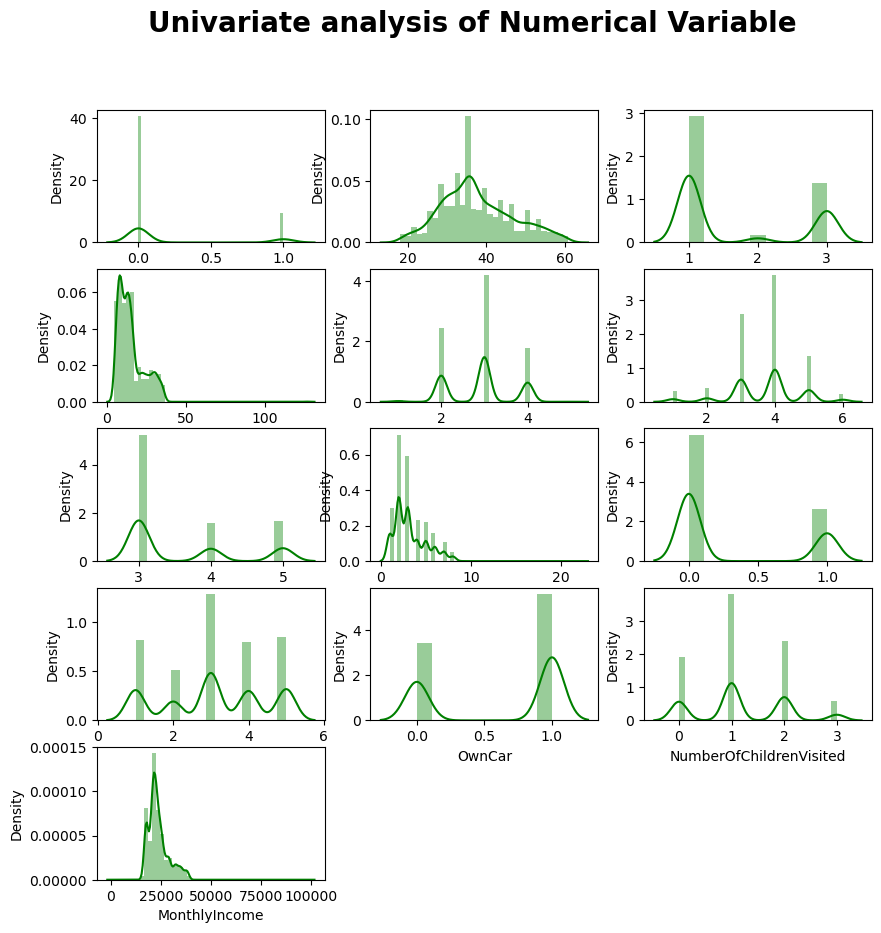

In [21]:
#Univariate Analysis on Numerical feature
plt.figure(figsize=(10,10))
plt.suptitle('Univariate analysis of Numerical Variable', fontsize=20, fontweight='bold')

for i in range (0, len(num_col)):
    plt.subplot(5,3,i+1)
    sns.distplot(df[num_col[i]], color='g')
    plt.xlabel(num_col[i])

# Multivariate analysis

In [22]:
df.corr()

ProdTaken       Age  CityTier  DurationOfPitch  \
ProdTaken                 1.000000 -0.144595  0.087184         0.076383   
Age                      -0.144595  1.000000 -0.013939        -0.007480   
CityTier                  0.087184 -0.013939  1.000000         0.019478   
DurationOfPitch           0.076383 -0.007480  0.019478         1.000000   
NumberOfPersonVisited     0.008915  0.015079 -0.002017         0.072196   
NumberOfFollowups         0.111774 -0.000581  0.024576         0.014951   
PreferredPropertyStar     0.098548 -0.018227 -0.010499        -0.005711   
NumberOfTrips             0.016980  0.174974 -0.028335         0.013944   
Passport                  0.261027  0.029805  0.001749         0.032632   
PitchSatisfactionScore    0.051952  0.016687 -0.041260        -0.002856   
OwnCar                   -0.012020  0.047458  0.005196        -0.002694   
NumberOfChildrenVisited   0.007920  0.005707  0.000421         0.037218   
MonthlyIncome            -0.126878  0.461556  0.051916         0.003009   

                         NumberOfPersonVisited  NumberOfFollowups  \
ProdTaken                             0.008915           0.111774   
Age                                   0.015079          -0.000581   
CityTier                             -0.002017           0.024576   
DurationOfPitch                       0.072196           0.014951   
NumberOfPersonVisited                 1.000000           0.325170   
NumberOfFollowups                     0.325170           1.000000   
PreferredPropertyStar                 0.030504          -0.028840   
NumberOfTrips                         0.189400           0.136057   
Passport                              0.008551           0.003005   
PitchSatisfactionScore               -0.019195           0.004219   
OwnCar                                0.010181           0.010685   
NumberOfChildrenVisited               0.606655           0.282781   
MonthlyIncome                         0.198061           0.176190   

                         PreferredPropertyStar  NumberOfTrips  Passport  \
ProdTaken                             0.098548       0.016980  0.261027   
Age                                  -0.018227       0.174974  0.029805   
CityTier                             -0.010499      -0.028335  0.001749   
DurationOfPitch                      -0.005711       0.013944  0.032632   
NumberOfPersonVisited                 0.030504       0.189400  0.008551   
NumberOfFollowups                    -0.028840       0.136057  0.003005   
PreferredPropertyStar                 1.000000       0.009914  0.000654   
NumberOfTrips                         0.009914       1.000000  0.012412   
Passport                              0.000654       0.012412  1.000000   
PitchSatisfactionScore               -0.022843      -0.003925  0.002262   
OwnCar                                0.013093      -0.012832 -0.022825   
NumberOfChildrenVisited               0.032006       0.160982  0.018051   
MonthlyIncome                        -0.000715       0.115331  0.002577   

                         PitchSatisfactionScore    OwnCar  \
ProdTaken                              0.051952 -0.012020   
Age                                    0.016687  0.047458   
CityTier                              -0.041260  0.005196   
DurationOfPitch                       -0.002856 -0.002694   
NumberOfPersonVisited                 -0.019195  0.010181   
NumberOfFollowups                      0.004219  0.010685   
PreferredPropertyStar                 -0.022843  0.013093   
NumberOfTrips                         -0.003925 -0.012832   
Passport                               0.002262 -0.022825   
PitchSatisfactionScore                 1.000000  0.067562   
OwnCar                                 0.067562  1.000000   
NumberOfChildrenVisited               -0.001176  0.024560   
MonthlyIncome                          0.028730  0.078535   

                         NumberOfChildrenVisited  MonthlyIncome  
ProdTaken                          

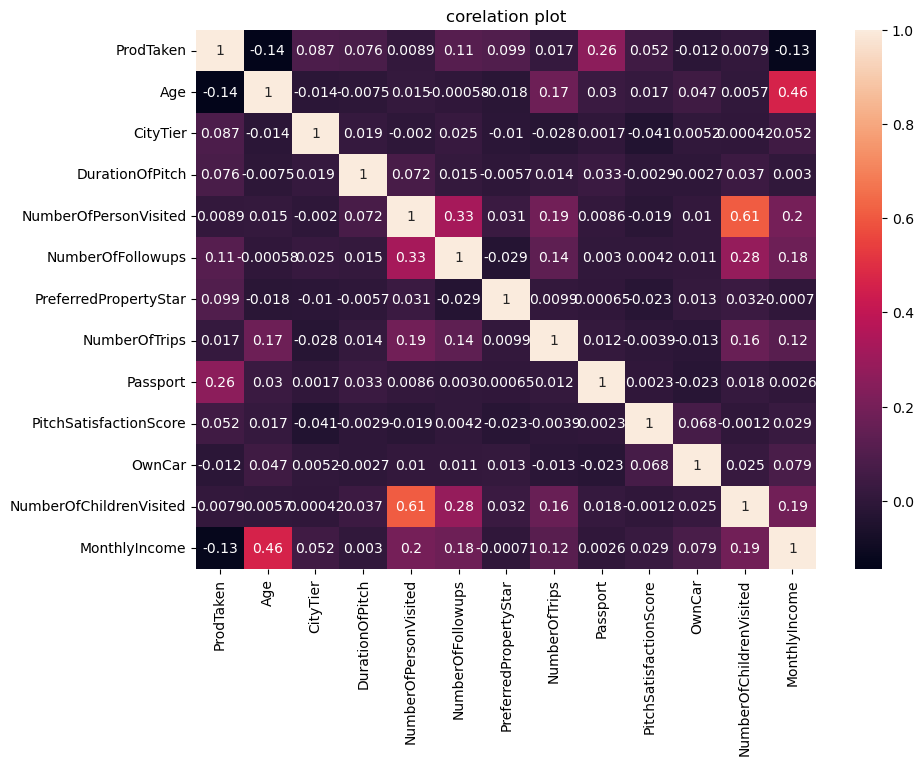

In [23]:
plt.figure(figsize=(10,7))
plt.title('corelation plot')
sns.heatmap(df[num_col].corr(), annot=True)
plt.show()

Observation:
    
    * "Number of perdon visited" and "Number of children visited " has good correlation.

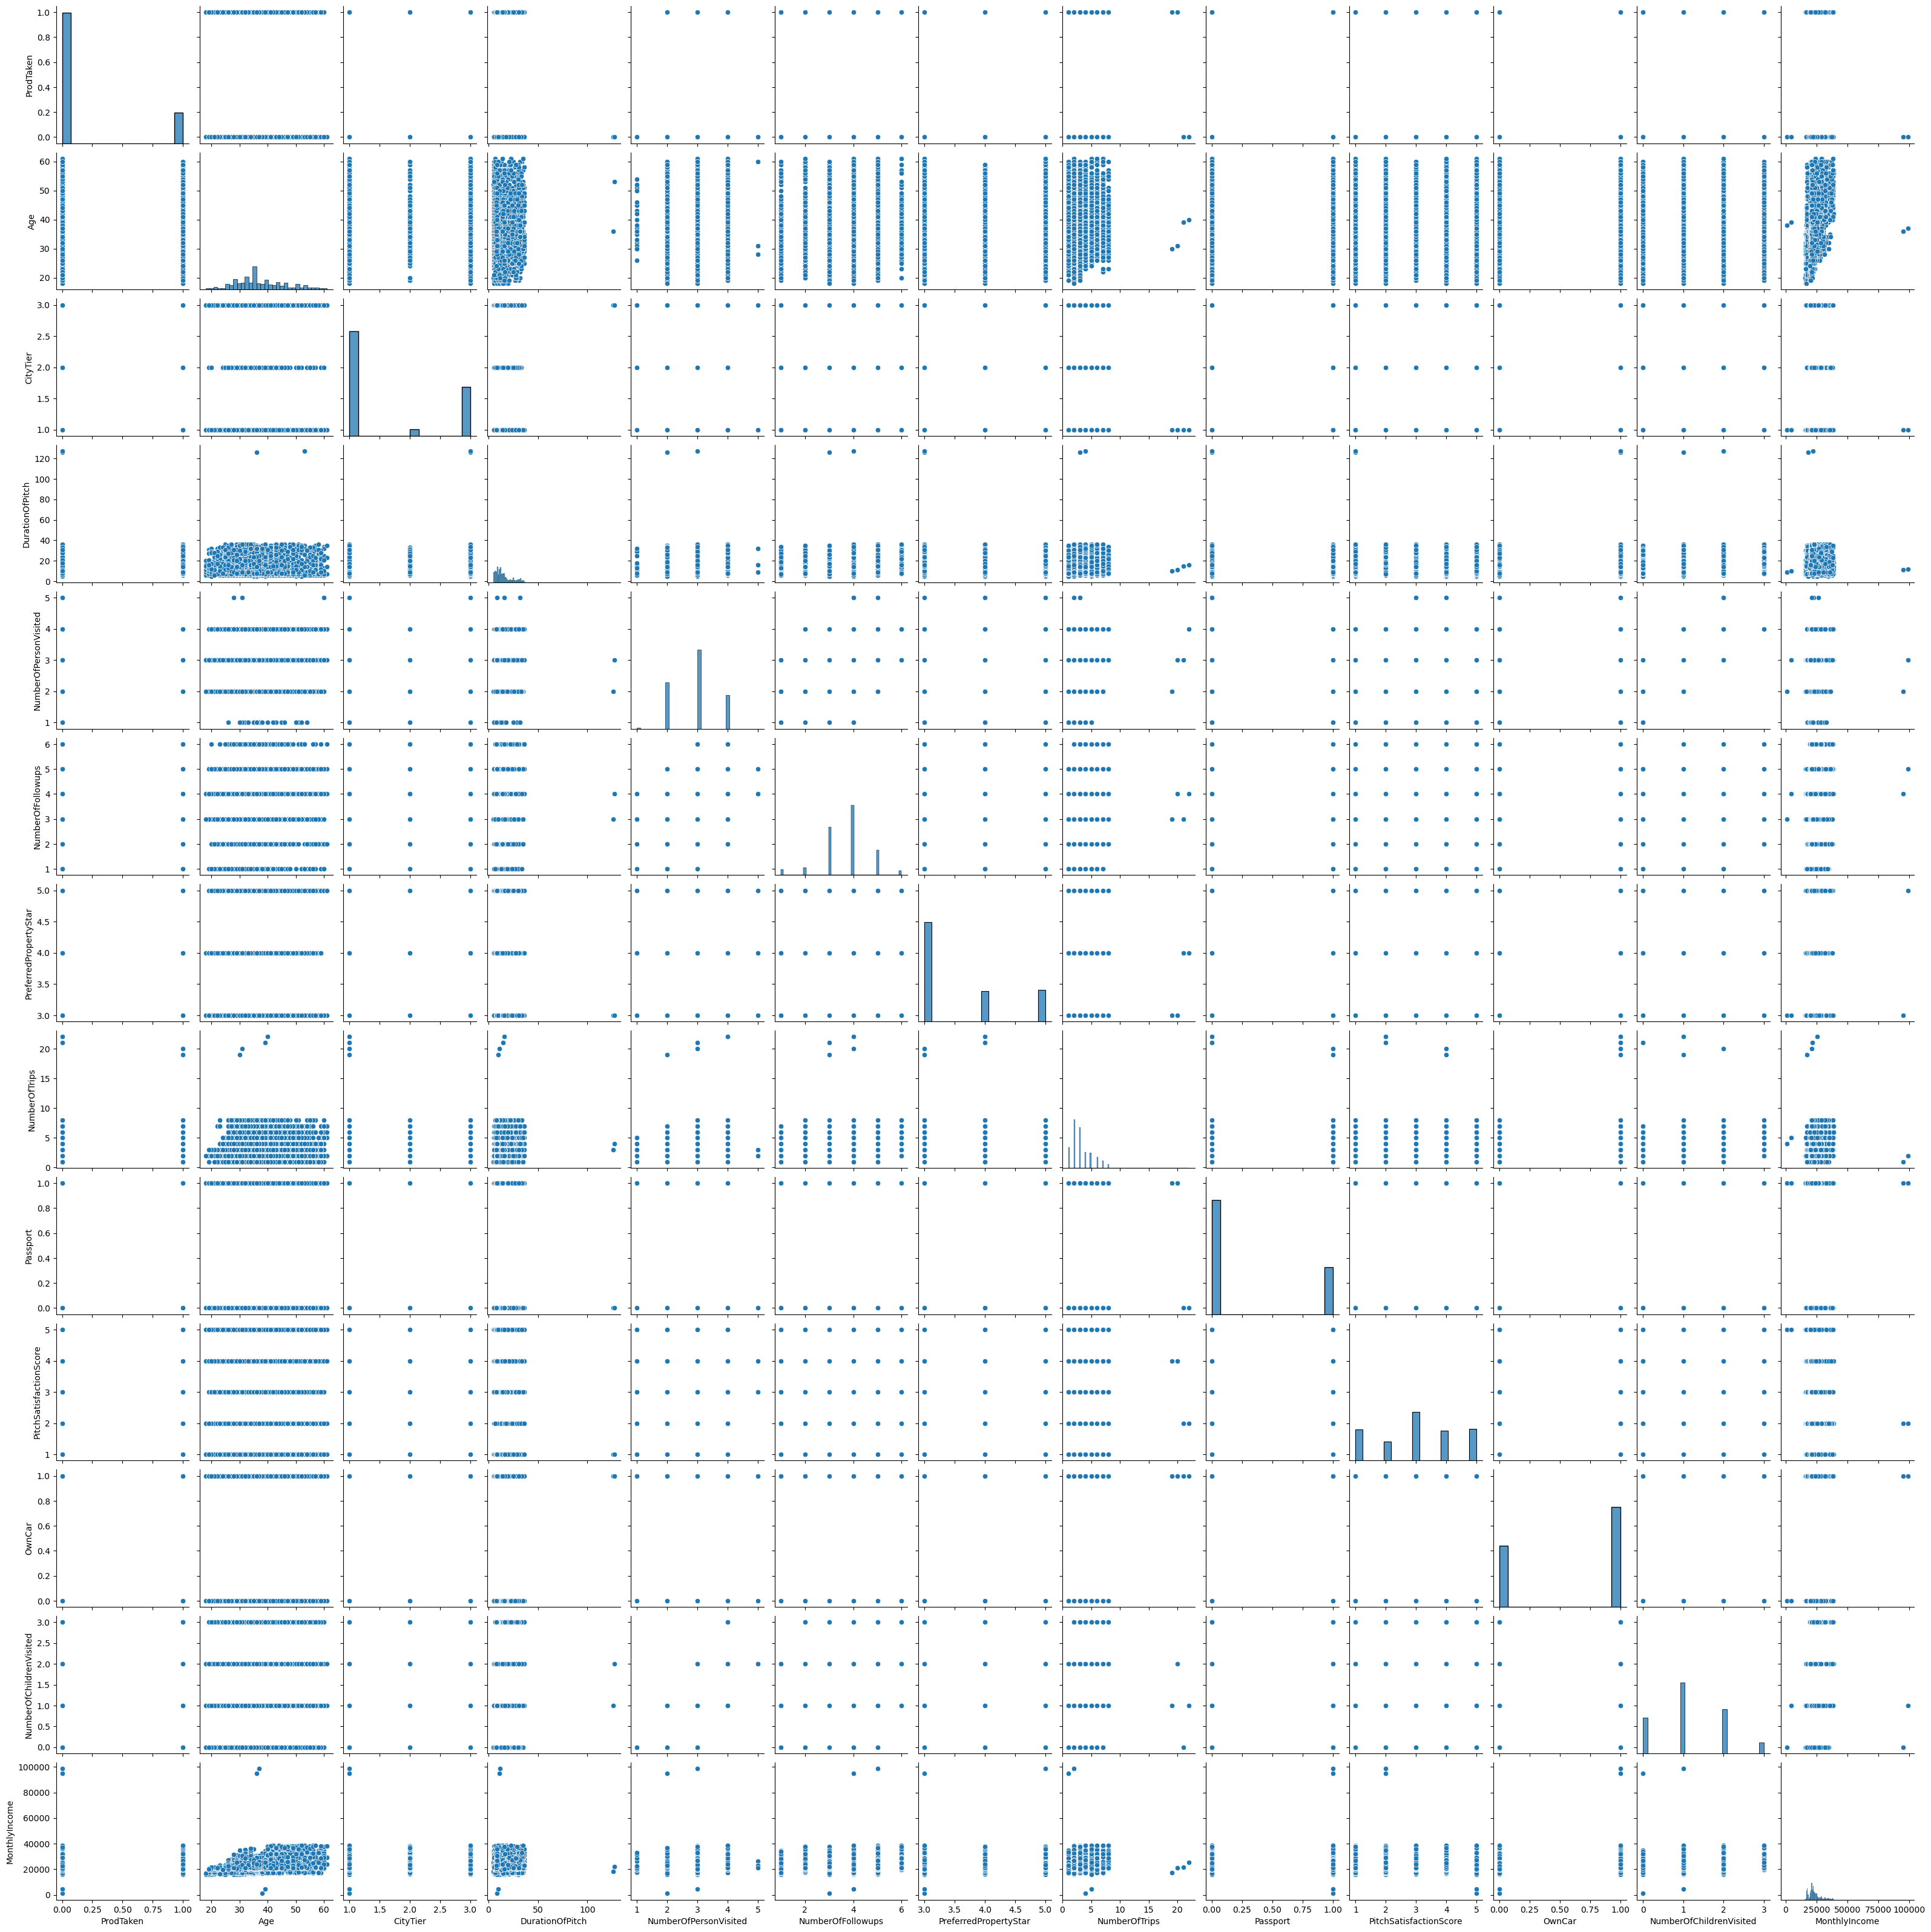

In [24]:
#Lets check the distributions of each feature
sns.pairplot(df)

In [25]:
df['Gender'].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [26]:
#We can see that there are extra spaces in the entries that we need to remove
df['Gender'] = df['Gender'].str.replace(' ','')
df['Gender'].unique()

array(['Female', 'Male', 'FeMale'], dtype=object)

In [27]:
df['Gender'] = df['Gender'].str.replace('FeMale','Female')
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [28]:
df.describe().T

count          mean          std     min      25%  \
ProdTaken                4863.0      0.188567     0.391204     0.0      0.0   
Age                      4863.0     37.585647     9.104766    18.0     31.0   
CityTier                 4863.0      1.654329     0.916498     1.0      1.0   
DurationOfPitch          4863.0     15.375077     8.335788     5.0      9.0   
NumberOfPersonVisited    4863.0      2.908081     0.724762     1.0      2.0   
NumberOfFollowups        4863.0      3.713346     0.996539     1.0      3.0   
PreferredPropertyStar    4863.0      3.578655     0.796907     3.0      3.0   
NumberOfTrips            4863.0      3.231339     1.822589     1.0      2.0   
Passport                 4863.0      0.292412     0.454917     0.0      0.0   
PitchSatisfactionScore   4863.0      3.079581     1.366446     1.0      2.0   
OwnCar                   4863.0      0.620605     0.485286     0.0      0.0   
NumberOfChildrenVisited  4863.0      1.187744     0.852271     0.0      1.0   
MonthlyIncome            4863.0  23565.411063  5270.642955  1000.0  20479.0   

                             50%      75%      max  
ProdTaken                    0.0      0.0      1.0  
Age                         36.0     43.0     61.0  
CityTier                     1.0      3.0      3.0  
DurationOfPitch             13.0     19.0    127.0  
NumberOfPersonVisited        3.0      3.0      5.0  
NumberOfFollowups            4.0      4.0      6.0  
PreferredPropertyStar        3.0      4.0      5.0  
NumberOfTrips                3.0      4.0     22.0  
Passport                     0.0      1.0      1.0  
PitchSatisfactionScore       3.0      4.0      5.0  
OwnCar                       1.0      1.0      1.0  
NumberOfChildrenVisited      1.0      2.0      3.0  
MonthlyIncome            22347.0  25447.5  98678.0

# Lets check the distribution of "NumberOfTrips" against various features

In [29]:
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in pt.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        pt.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

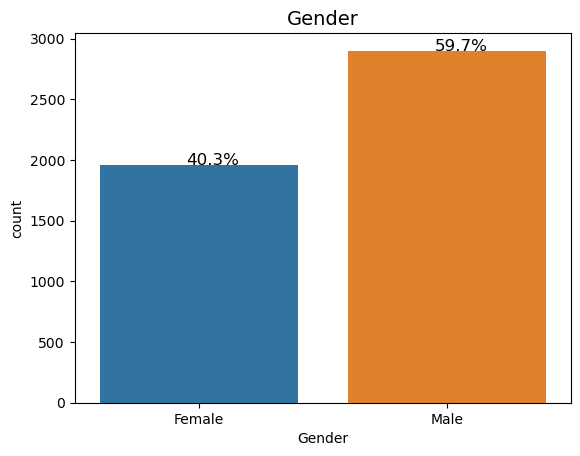

In [30]:
pt=sns.countplot('Gender', data=df, palette="tab10")
plt.title('Gender', fontsize=14)
perc_on_bar(pt,df["Gender"])

Observation:

* 59.7% of Male has taken the trip which is more than Female

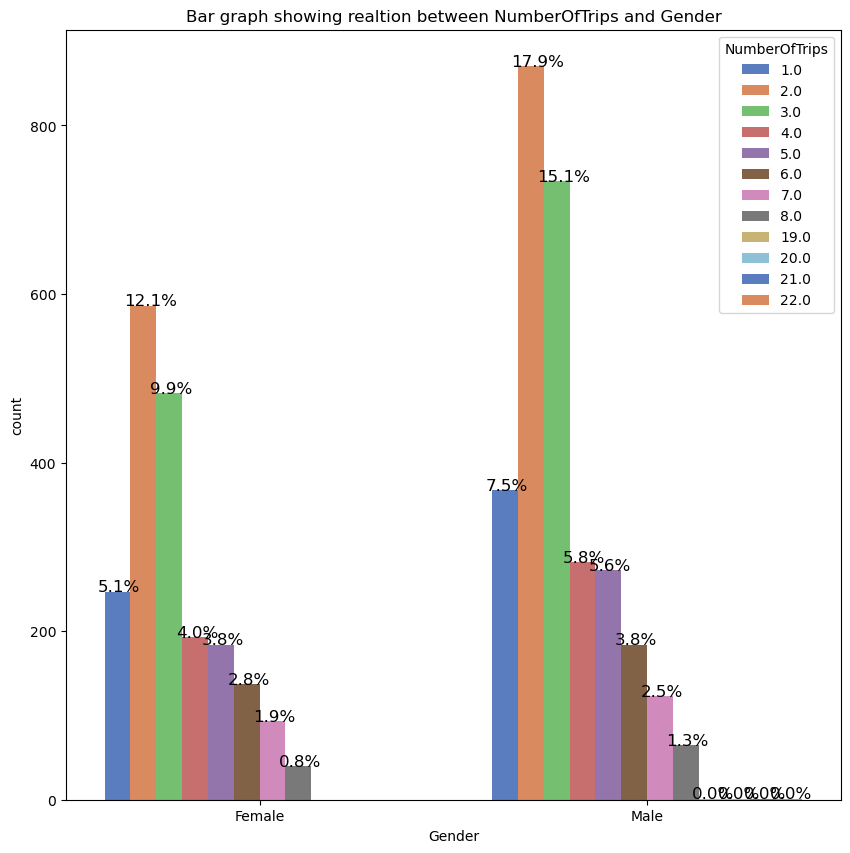

In [31]:
plt.figure(figsize=(10,10))
plt.title('Bar graph showing realtion between NumberOfTrips and Gender')
pt = sns.countplot(data= df, hue = 'NumberOfTrips', x= 'Gender', palette = "muted")
perc_on_bar(pt,df["NumberOfTrips"])

Observation:
    
    * Maximum of 12.1% female and 17.9% male has taken 2 trip, mejority number of trips taken are 2

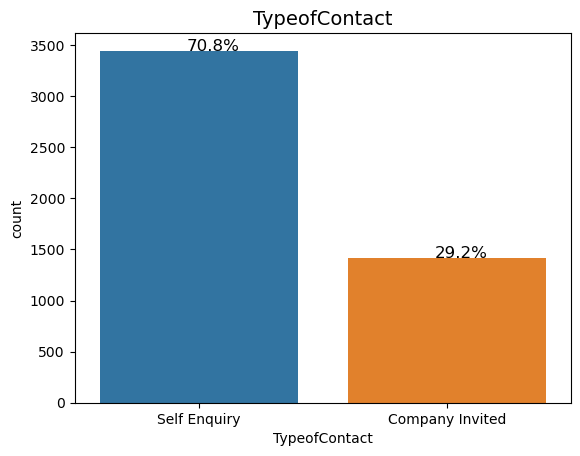

In [32]:
pt=sns.countplot('TypeofContact', data=df, palette="tab10")
plt.title('TypeofContact', fontsize=14)
perc_on_bar(pt,df["TypeofContact"])

In [33]:
df.TypeofContact.value_counts()[0:10]

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

* Number of trips taken through self enquiry are more

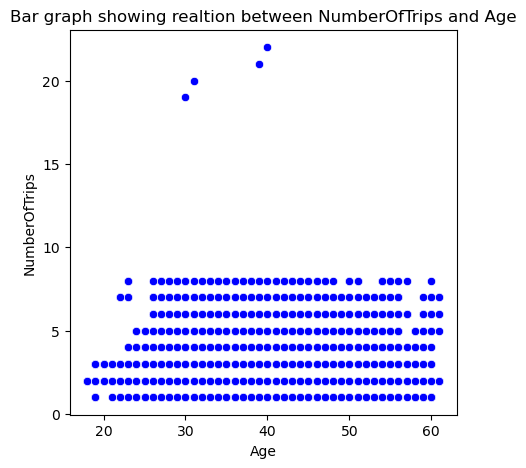

In [34]:
#df[['NumberOfTrips', 'Gender', 'Age']].plot(x='NumberOfTrips', kind='bar', stacked=True)
plt.figure(figsize=(5,5))
plt.title('Bar graph showing realtion between NumberOfTrips and Age')
pt= sns.scatterplot(data= df, y = 'NumberOfTrips', x = 'Age', color='b')

* People aged 40 have taken more number of trips

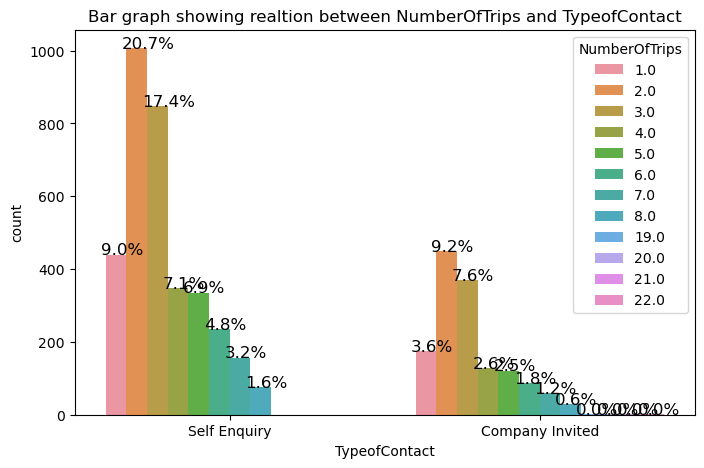

In [35]:
plt.figure(figsize=(8,5))
plt.title('Bar graph showing realtion between NumberOfTrips and TypeofContact')
pt=sns.countplot(data= df, hue = 'NumberOfTrips', x= 'TypeofContact')
perc_on_bar(pt,df["NumberOfTrips"])

<AxesSubplot:title={'center':'Bar graph showing realtion between NumberOfTrips and MaritalStatus'}, xlabel='MaritalStatus', ylabel='Count'>

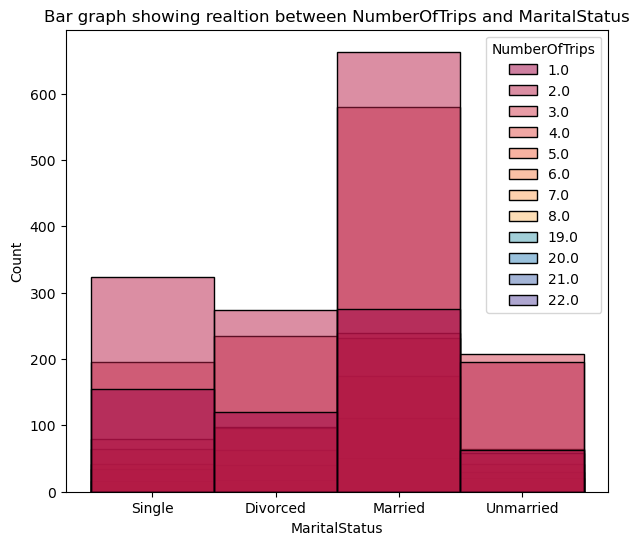

In [36]:
plt.figure(figsize=(7,6))
plt.title('Bar graph showing realtion between NumberOfTrips and MaritalStatus')
sns.histplot(data= df, hue = 'NumberOfTrips', x= 'MaritalStatus', palette = "Spectral")

* Married people have taken more number of trips and then comes single one's

<AxesSubplot:title={'center':'Bar graph showing realtion between MonthlyIncome and NumberOfTrips'}, xlabel='MonthlyIncome', ylabel='NumberOfTrips'>

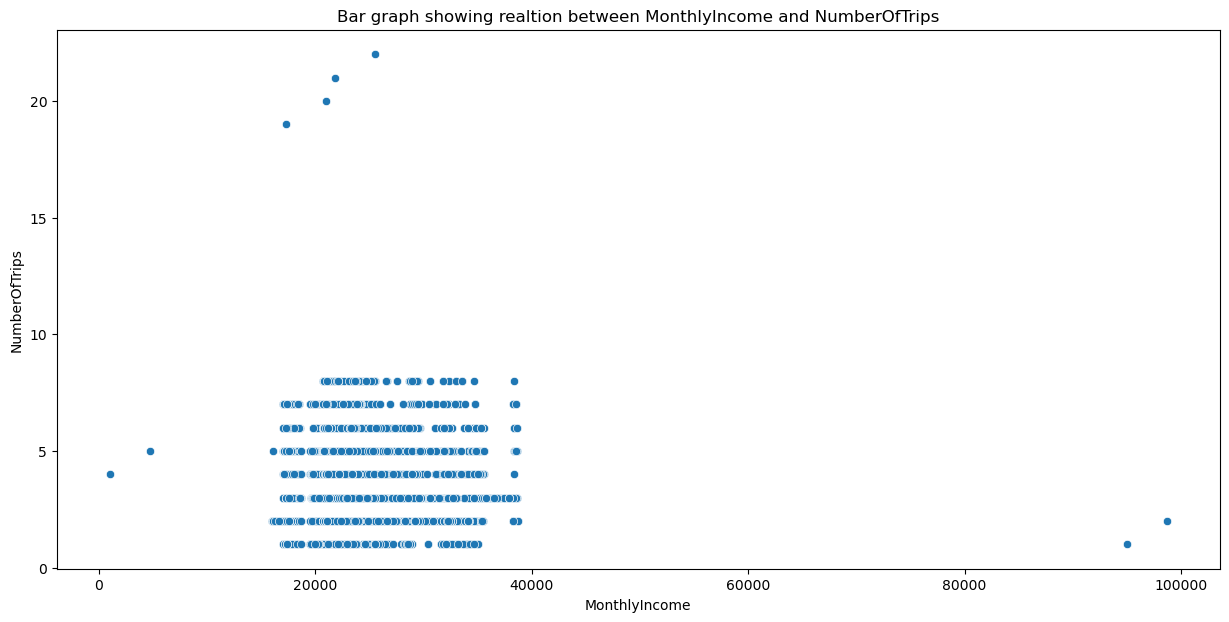

In [37]:
plt.figure(figsize=(15,7))
plt.title('Bar graph showing realtion between MonthlyIncome and NumberOfTrips')
sns.scatterplot(data= df, y = 'NumberOfTrips', x= 'MonthlyIncome')

* The people who has taken more number of trips has monthly income between 20k-40k$

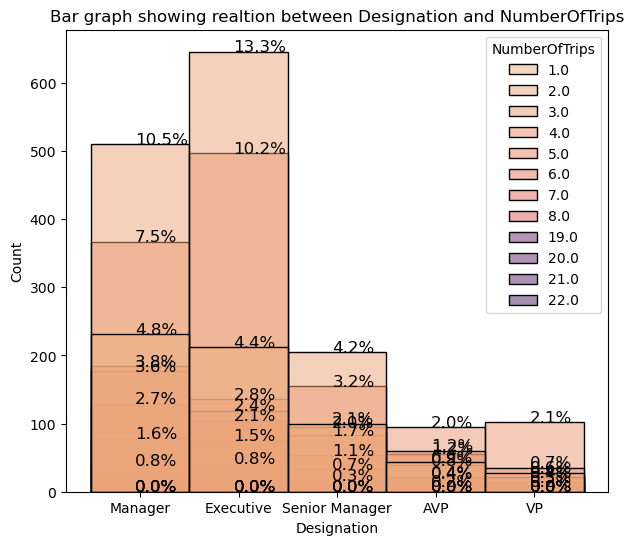

In [38]:
plt.figure(figsize=(7,6))
plt.title('Bar graph showing realtion between Designation and NumberOfTrips')
pt=sns.histplot(data= df, hue = 'NumberOfTrips', x= 'Designation',palette = "flare")
perc_on_bar(pt,df["NumberOfTrips"])

* Executives and Managers have taken more number of trips

<AxesSubplot:title={'center':'Bar graph showing realtion between OwnCar and NumberOfTrips'}, xlabel='OwnCar', ylabel='NumberOfTrips'>

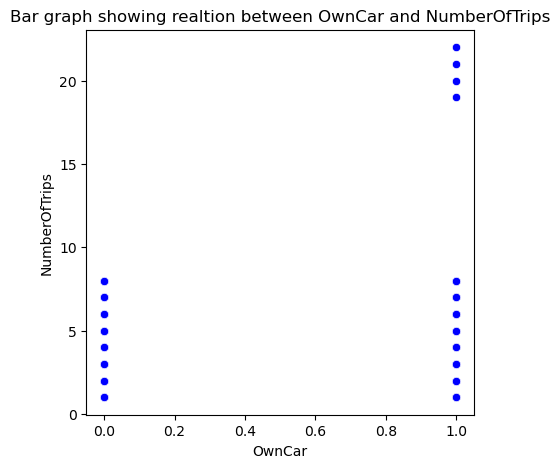

In [39]:
#df[['NumberOfTrips', 'Gender', 'Age']].plot(x='NumberOfTrips', kind='bar', stacked=True)
plt.figure(figsize=(5,5))
plt.title('Bar graph showing realtion between OwnCar and NumberOfTrips')
sns.scatterplot(data= df, y = 'NumberOfTrips', x = 'OwnCar', color='b')

* Number of trips taken by own car are more

# Visualize the Target Feature

In [40]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [41]:
df.ProdTaken.value_counts()[0:10]

0    3946
1     917
Name: ProdTaken, dtype: int64

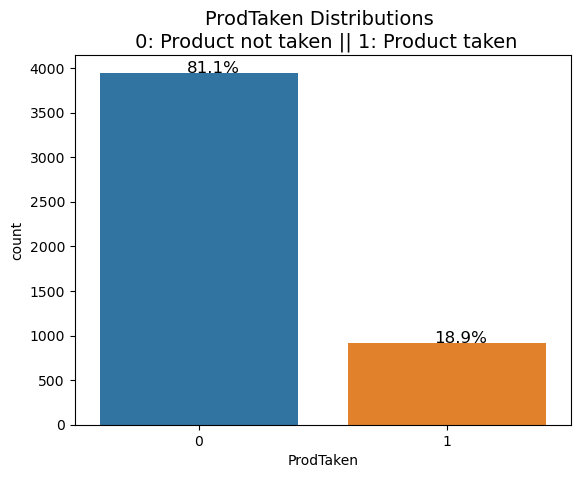

In [42]:
pt=sns.countplot('ProdTaken', data=df, palette="tab10")
plt.title('ProdTaken Distributions \n 0: Product not taken || 1: Product taken', fontsize=14)
perc_on_bar(pt,df["ProdTaken"])

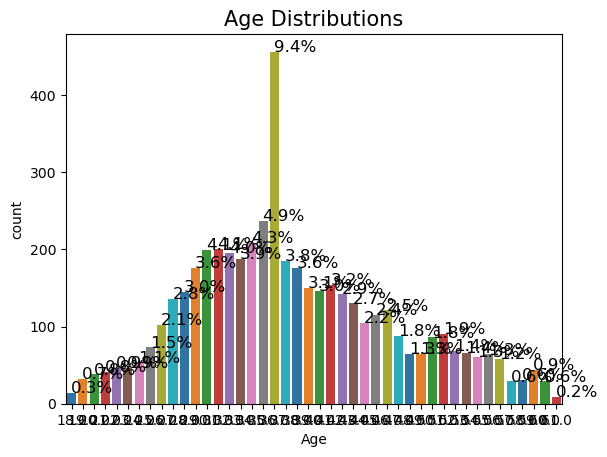

In [43]:
pt=sns.countplot('Age', data=df, palette="tab10")
plt.title('Age Distributions', fontsize=15)
perc_on_bar(pt,df["Age"])

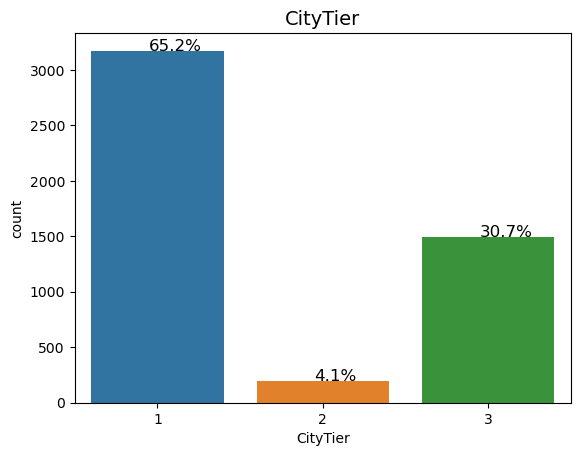

In [44]:
pt=sns.countplot('CityTier', data=df, palette="tab10")
plt.title('CityTier', fontsize=14)
perc_on_bar(pt,df["CityTier"])

In [45]:
df.CityTier.value_counts()[0:10]

1    3173
3    1492
2     198
Name: CityTier, dtype: int64

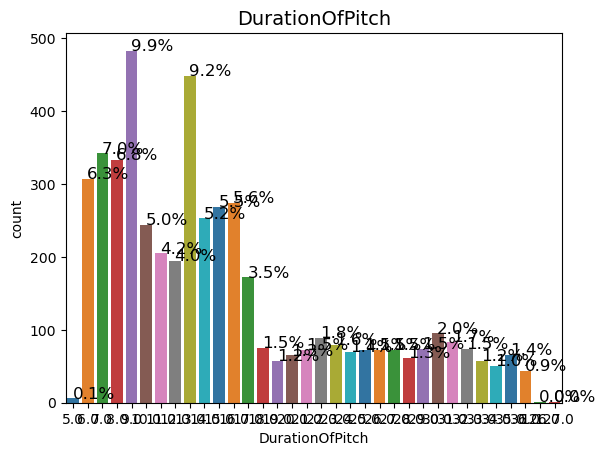

In [46]:
pt=sns.countplot('DurationOfPitch', data=df, palette="tab10")
plt.title('DurationOfPitch', fontsize=14)
perc_on_bar(pt,df["DurationOfPitch"])

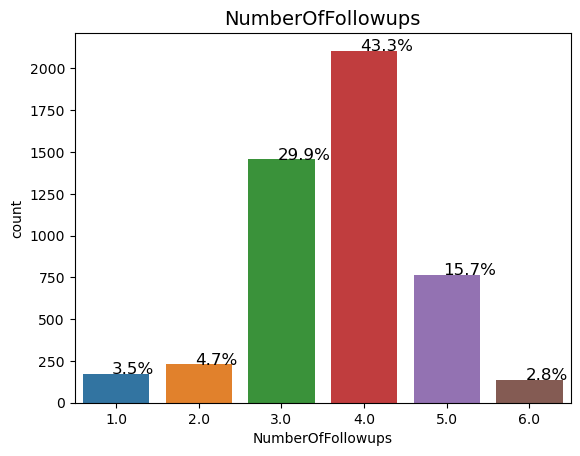

In [47]:
pt=sns.countplot('NumberOfFollowups', data=df, palette="tab10")
plt.title('NumberOfFollowups', fontsize=14)
perc_on_bar(pt,df["NumberOfFollowups"])

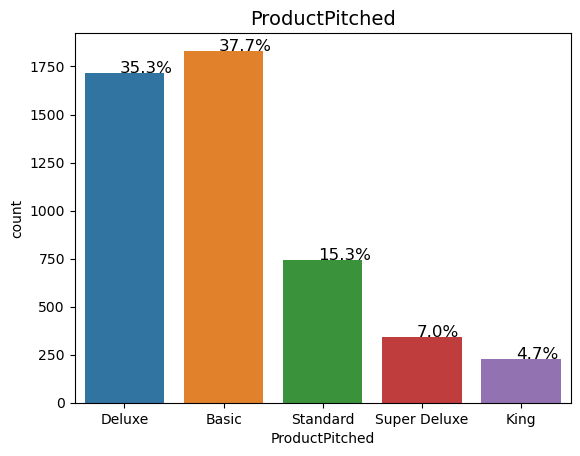

In [48]:
pt=sns.countplot('ProductPitched', data=df, palette="tab10")
plt.title('ProductPitched', fontsize=14)
perc_on_bar(pt,df["ProductPitched"])

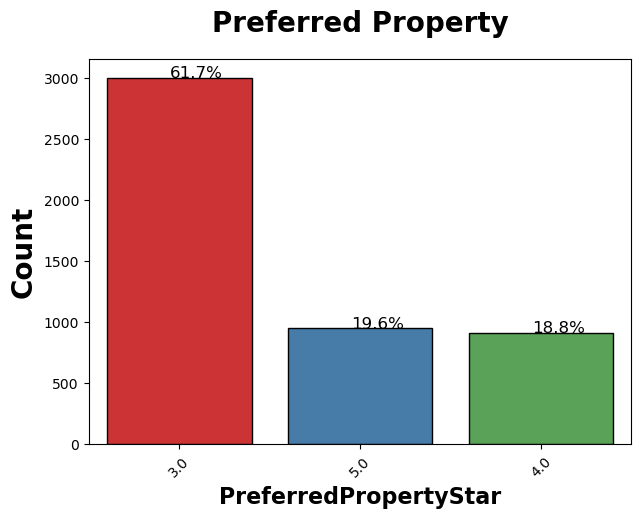

In [50]:
plt.subplots(figsize=(7,5))
pt=sns.countplot(x="PreferredPropertyStar", data=df,ec = "black",palette="Set1",order = df['PreferredPropertyStar'].value_counts().index)
plt.title("Preferred Property", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("PreferredPropertyStar", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
perc_on_bar(pt,df["PreferredPropertyStar"])
plt.show()

* 3 star is the most prefered property

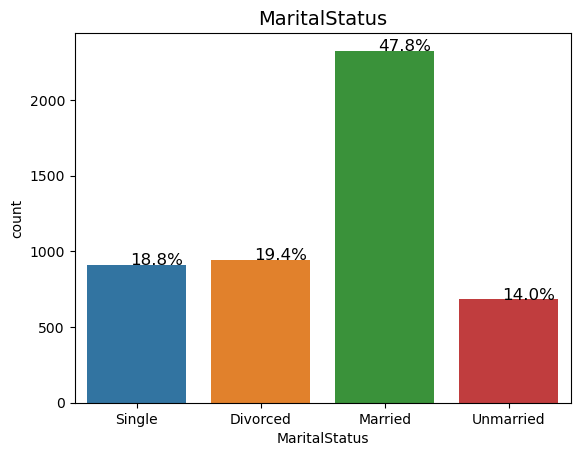

In [51]:
pt=sns.countplot('MaritalStatus', data=df, palette="tab10")
plt.title('MaritalStatus', fontsize=14)
perc_on_bar(pt,df["MaritalStatus"])

In [52]:
df.MaritalStatus.value_counts()[0:10]

Married      2325
Divorced      944
Single        912
Unmarried     682
Name: MaritalStatus, dtype: int64

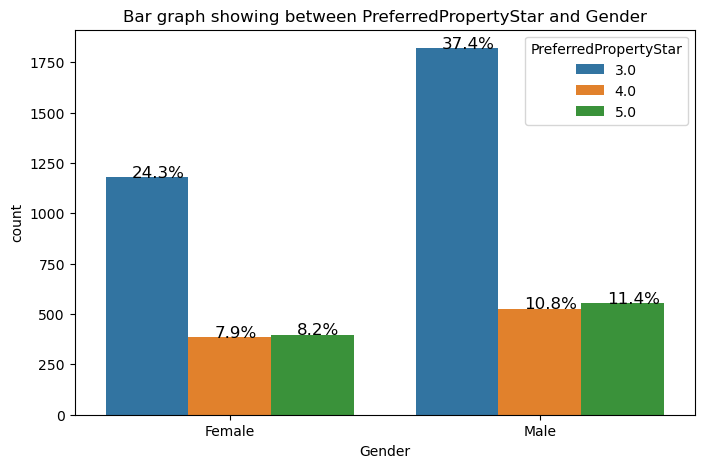

In [53]:
plt.figure(figsize=(8,5))
plt.title('Bar graph showing between PreferredPropertyStar and Gender')
pt=sns.countplot(data= df, hue = 'PreferredPropertyStar', x= 'Gender')
perc_on_bar(pt,df["PreferredPropertyStar"])

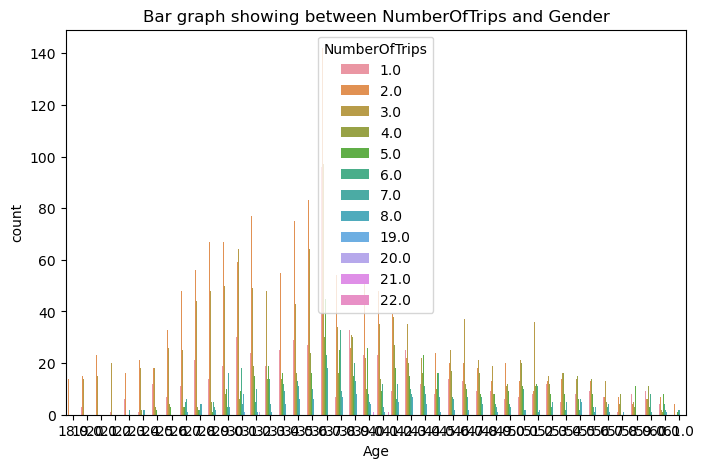

In [54]:
plt.figure(figsize=(8,5))
plt.title('Bar graph showing between NumberOfTrips and Gender')
pt=sns.countplot(data= df, hue = 'NumberOfTrips', x= 'Age')

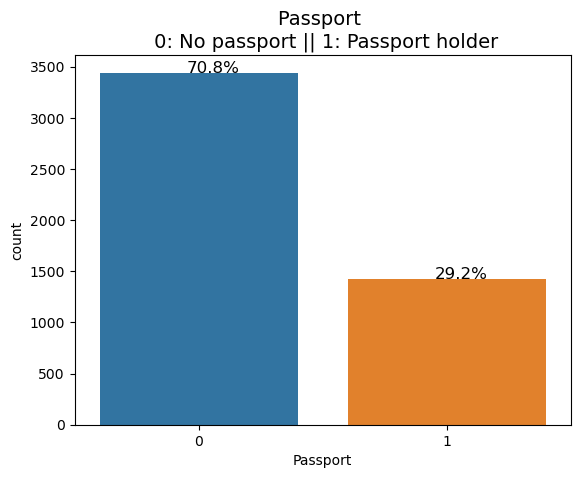

In [55]:
pt=sns.countplot('Passport', data=df, palette="tab10")
plt.title('Passport \n 0: No passport || 1: Passport holder' , fontsize=14)
perc_on_bar(pt,df["Passport"])

In [56]:
df.Passport.value_counts()[0:10]

0    3441
1    1422
Name: Passport, dtype: int64

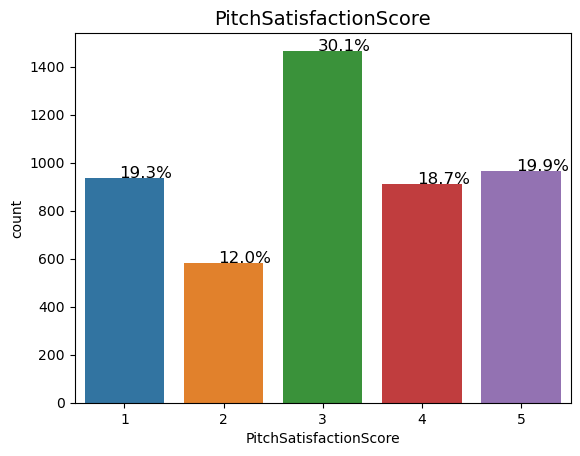

In [57]:
pt=sns.countplot('PitchSatisfactionScore', data=df, palette="tab10")
plt.title('PitchSatisfactionScore' , fontsize=14)
perc_on_bar(pt,df["PitchSatisfactionScore"])

In [58]:
df.PitchSatisfactionScore.value_counts()[0:10]

3    1466
5     967
1     937
4     910
2     583
Name: PitchSatisfactionScore, dtype: int64

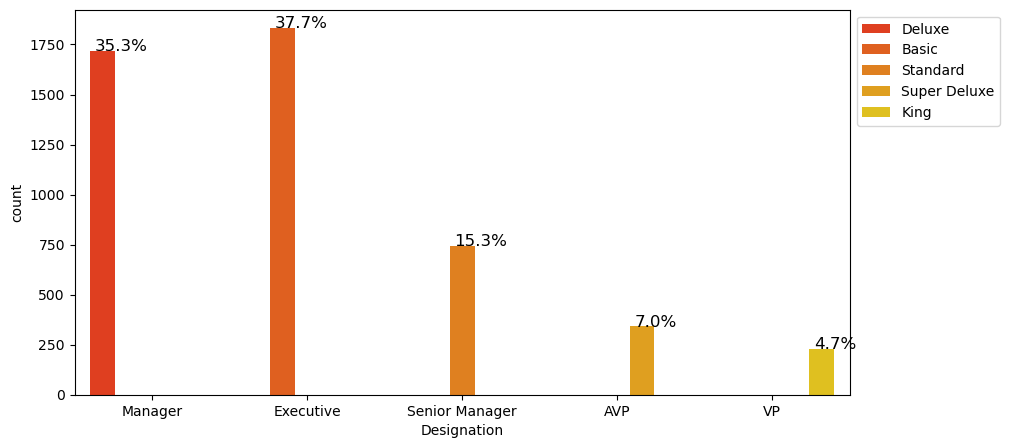

In [59]:
plt.figure(figsize=(10,5))
pt=sns.countplot(df["Designation"],hue=df["ProductPitched"],palette='autumn')
plt.legend(bbox_to_anchor=(1.00, 1))
perc_on_bar(pt,df["Designation"])
plt.show()

In [60]:
df.Occupation.value_counts()[0:10]

Salaried          2363
Small Business    2064
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Observation:

    Managers are tend to use Delux products and Executives are going for basic

# Distribution of features as per Product taken

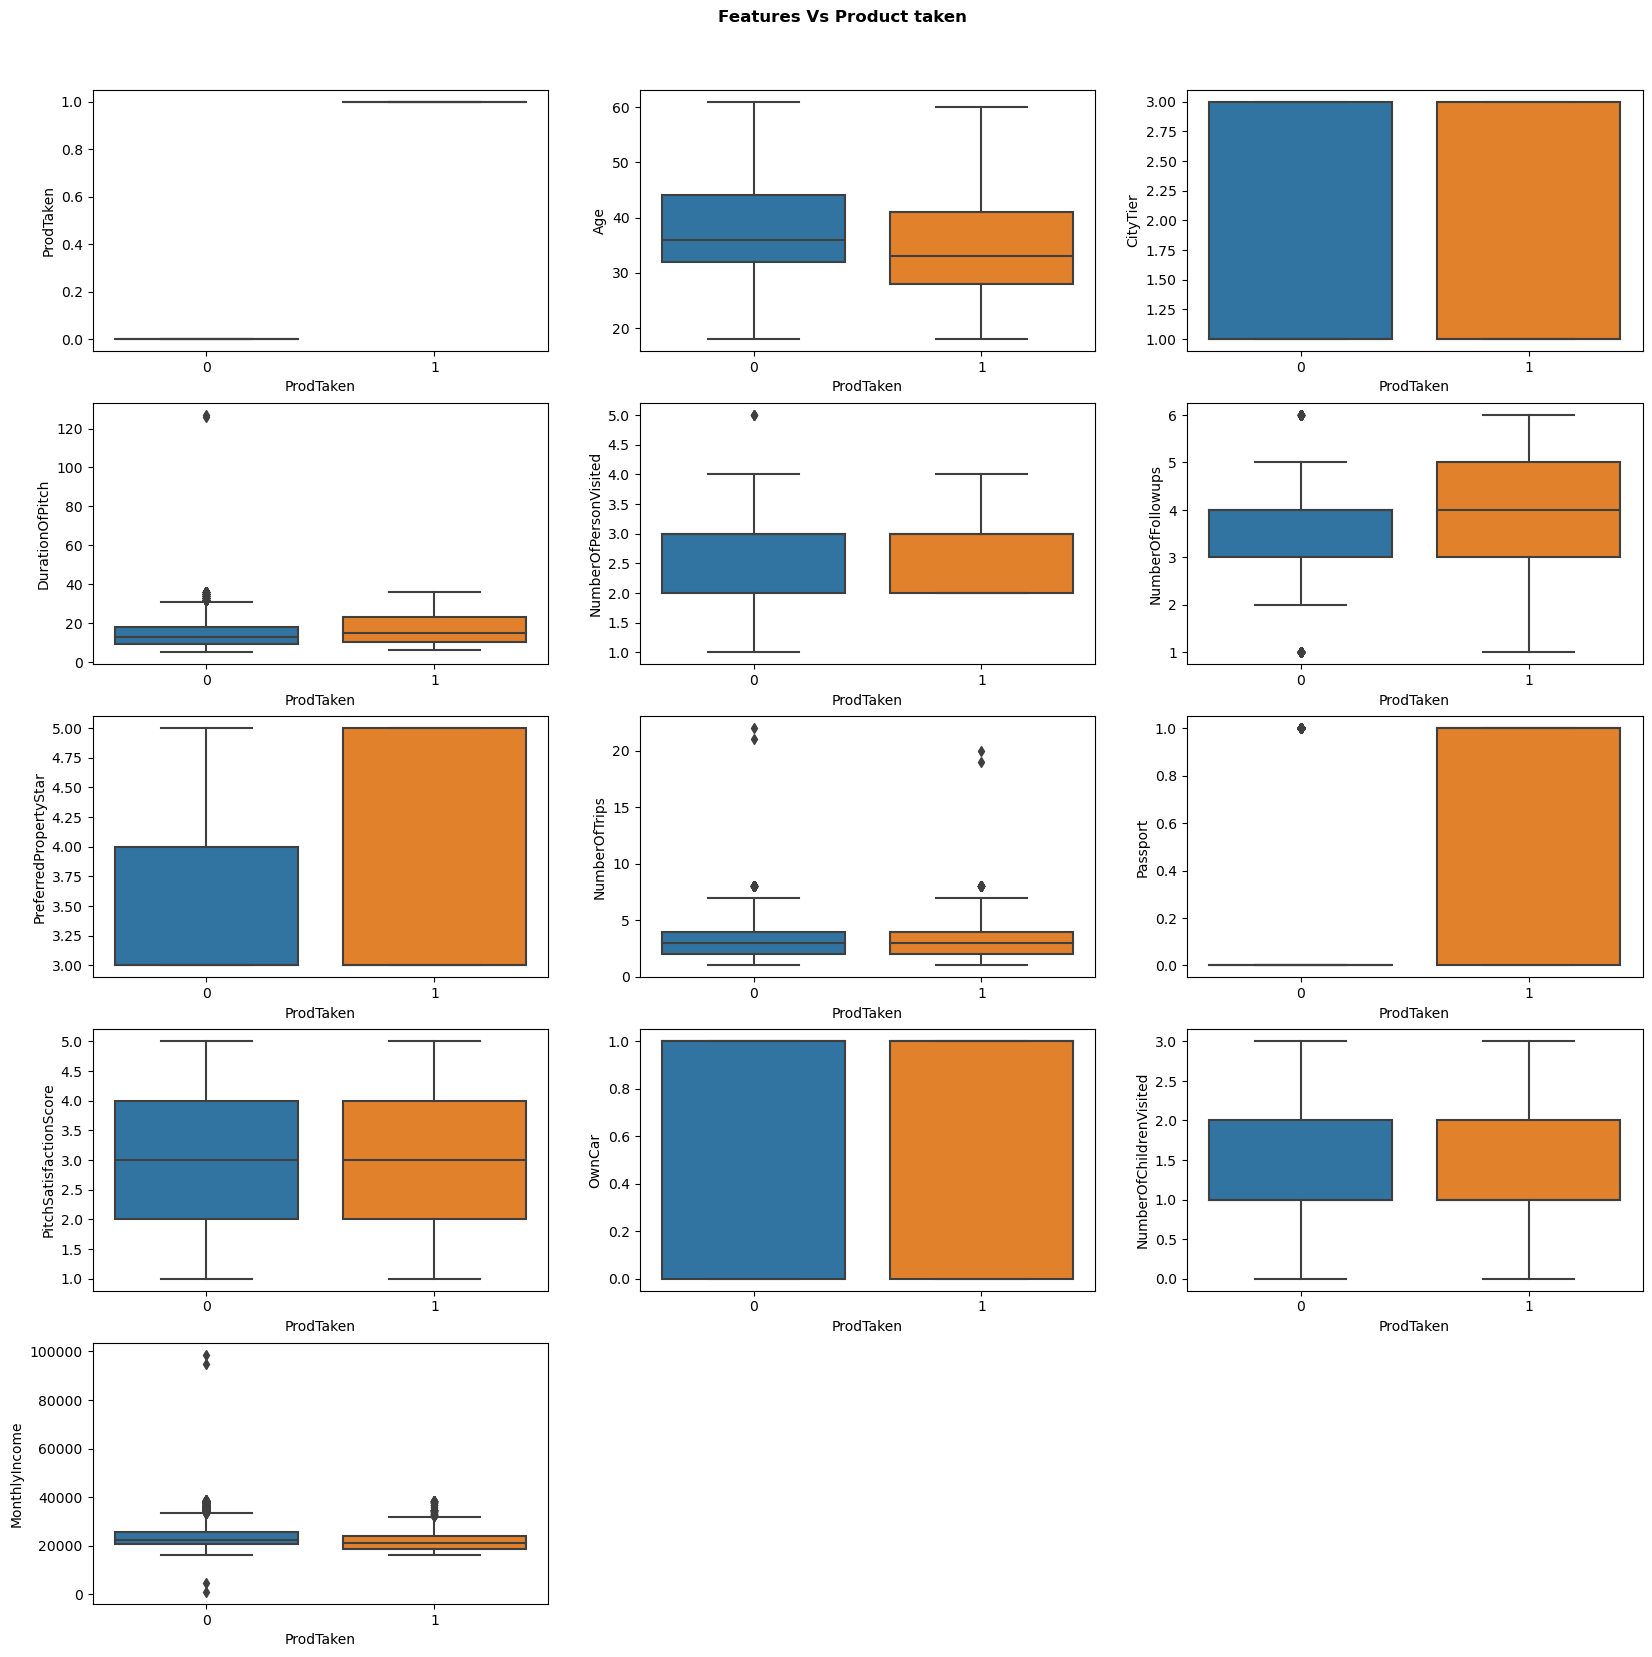

In [61]:
plt.figure(figsize=(20,40))
plt.suptitle("Features Vs Product taken",fontweight='bold',y=0.9)
for i in range(0, len(num_col)):
    ax = plt.subplot(10, 3, i+1)
    sns.boxplot(data = df, x = 'ProdTaken', y = df[num_col[i]])

In [62]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [63]:
#Dropping the column where the column correlates 
df.drop(['NumberOfChildrenVisited'],axis=1, inplace=True)

In [64]:
df.head()

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0          1  41.0     Self Enquiry         3              6.0   
1          0  49.0  Company Invited         1             14.0   
2          1  37.0     Self Enquiry         1              8.0   
3          0  33.0  Company Invited         1              9.0   
4          0  36.0     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisited  NumberOfFollowups  \
0        Salaried  Female                      3                3.0   
1        Salaried    Male                      3                4.0   
2     Free Lancer    Male                      3                4.0   
3        Salaried  Female                      2                3.0   
4  Small Business    Male                      2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar Designation  MonthlyIncome  
0         1                       2       1     Manager        20993.0  
1         0                       3       1     Manager        20130.0  
2         1                       3       0   Executive        17090.0  
3         1                       5       1   Executive        17909.0  
4         0                       5       1   Executive        18468.0

**Remove Outliers from the following features :DurationOfPitch, MonthlyIncome, NumberOfPersonVisiting, NumberOfTrips**

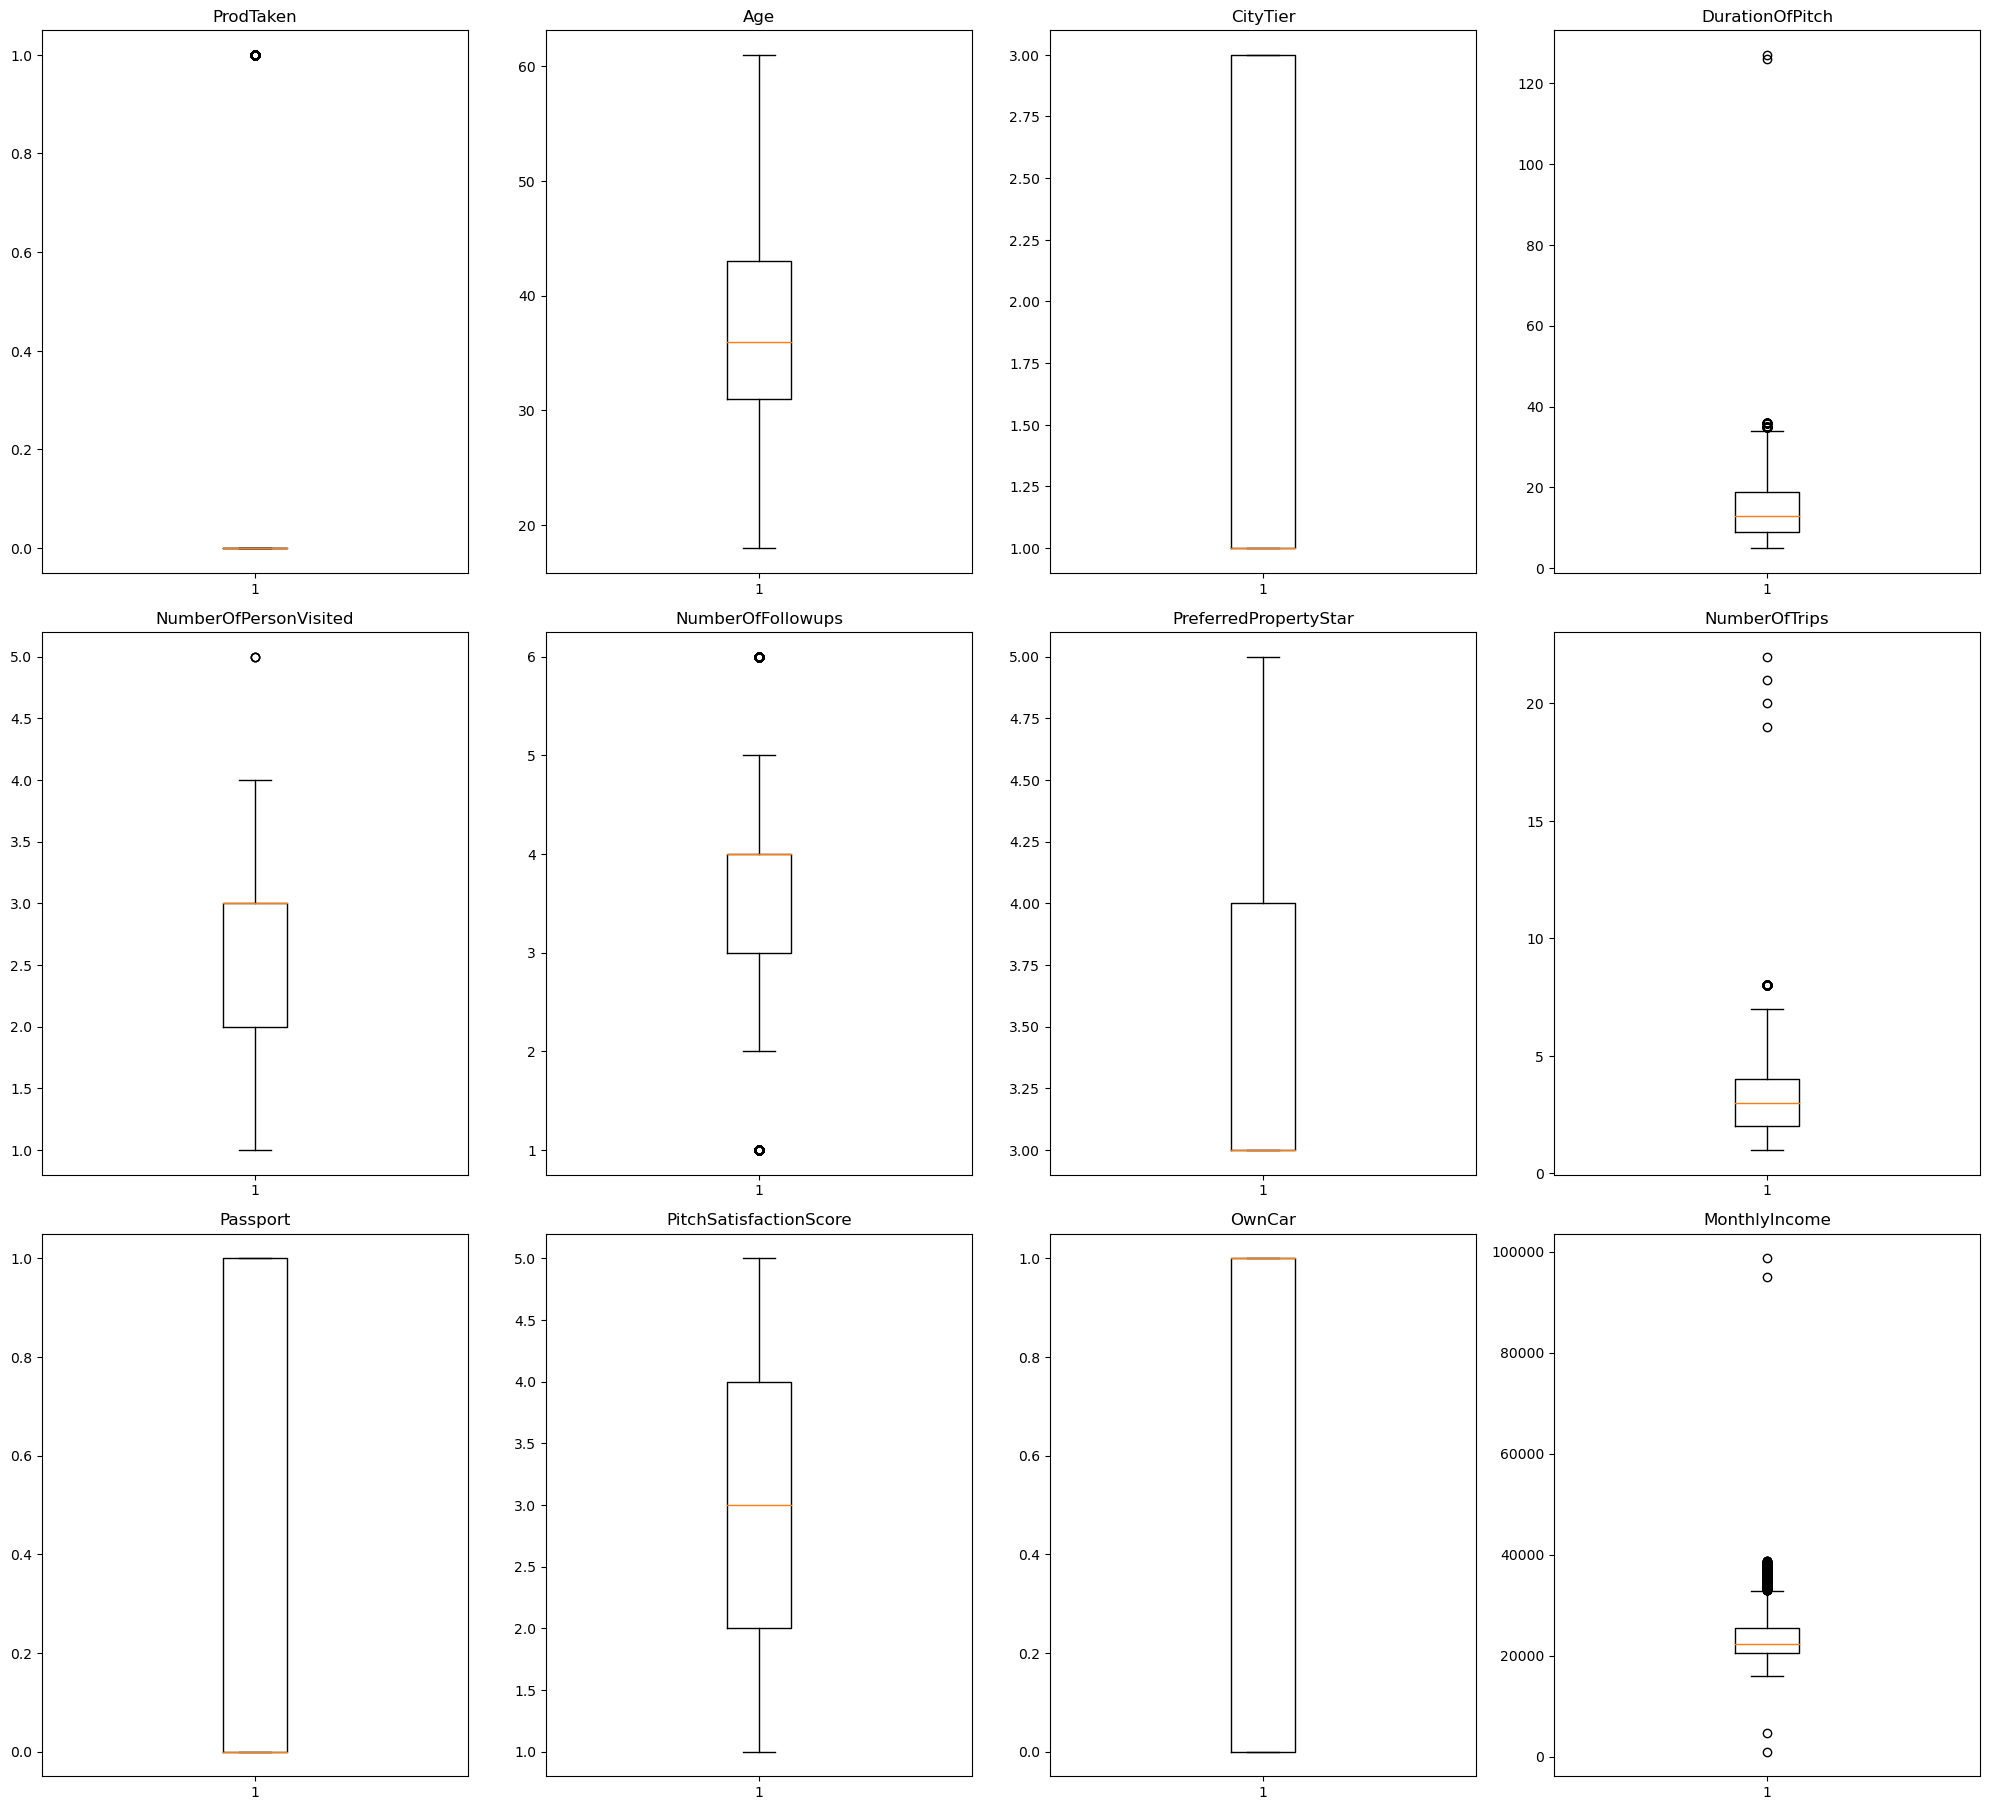

In [65]:
# Detect the outlier in the numerical variables using boxplot
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

# Data Modelling

In [66]:
x = df.drop(['ProdTaken'],axis=1)

In [67]:
y = df ['ProdTaken']

In [68]:
#Outlier functions 
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data

In [69]:
#Remove the outliers in numerical features
numerical_col = x.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

x = treat_outliers_all(x,numerical_col)

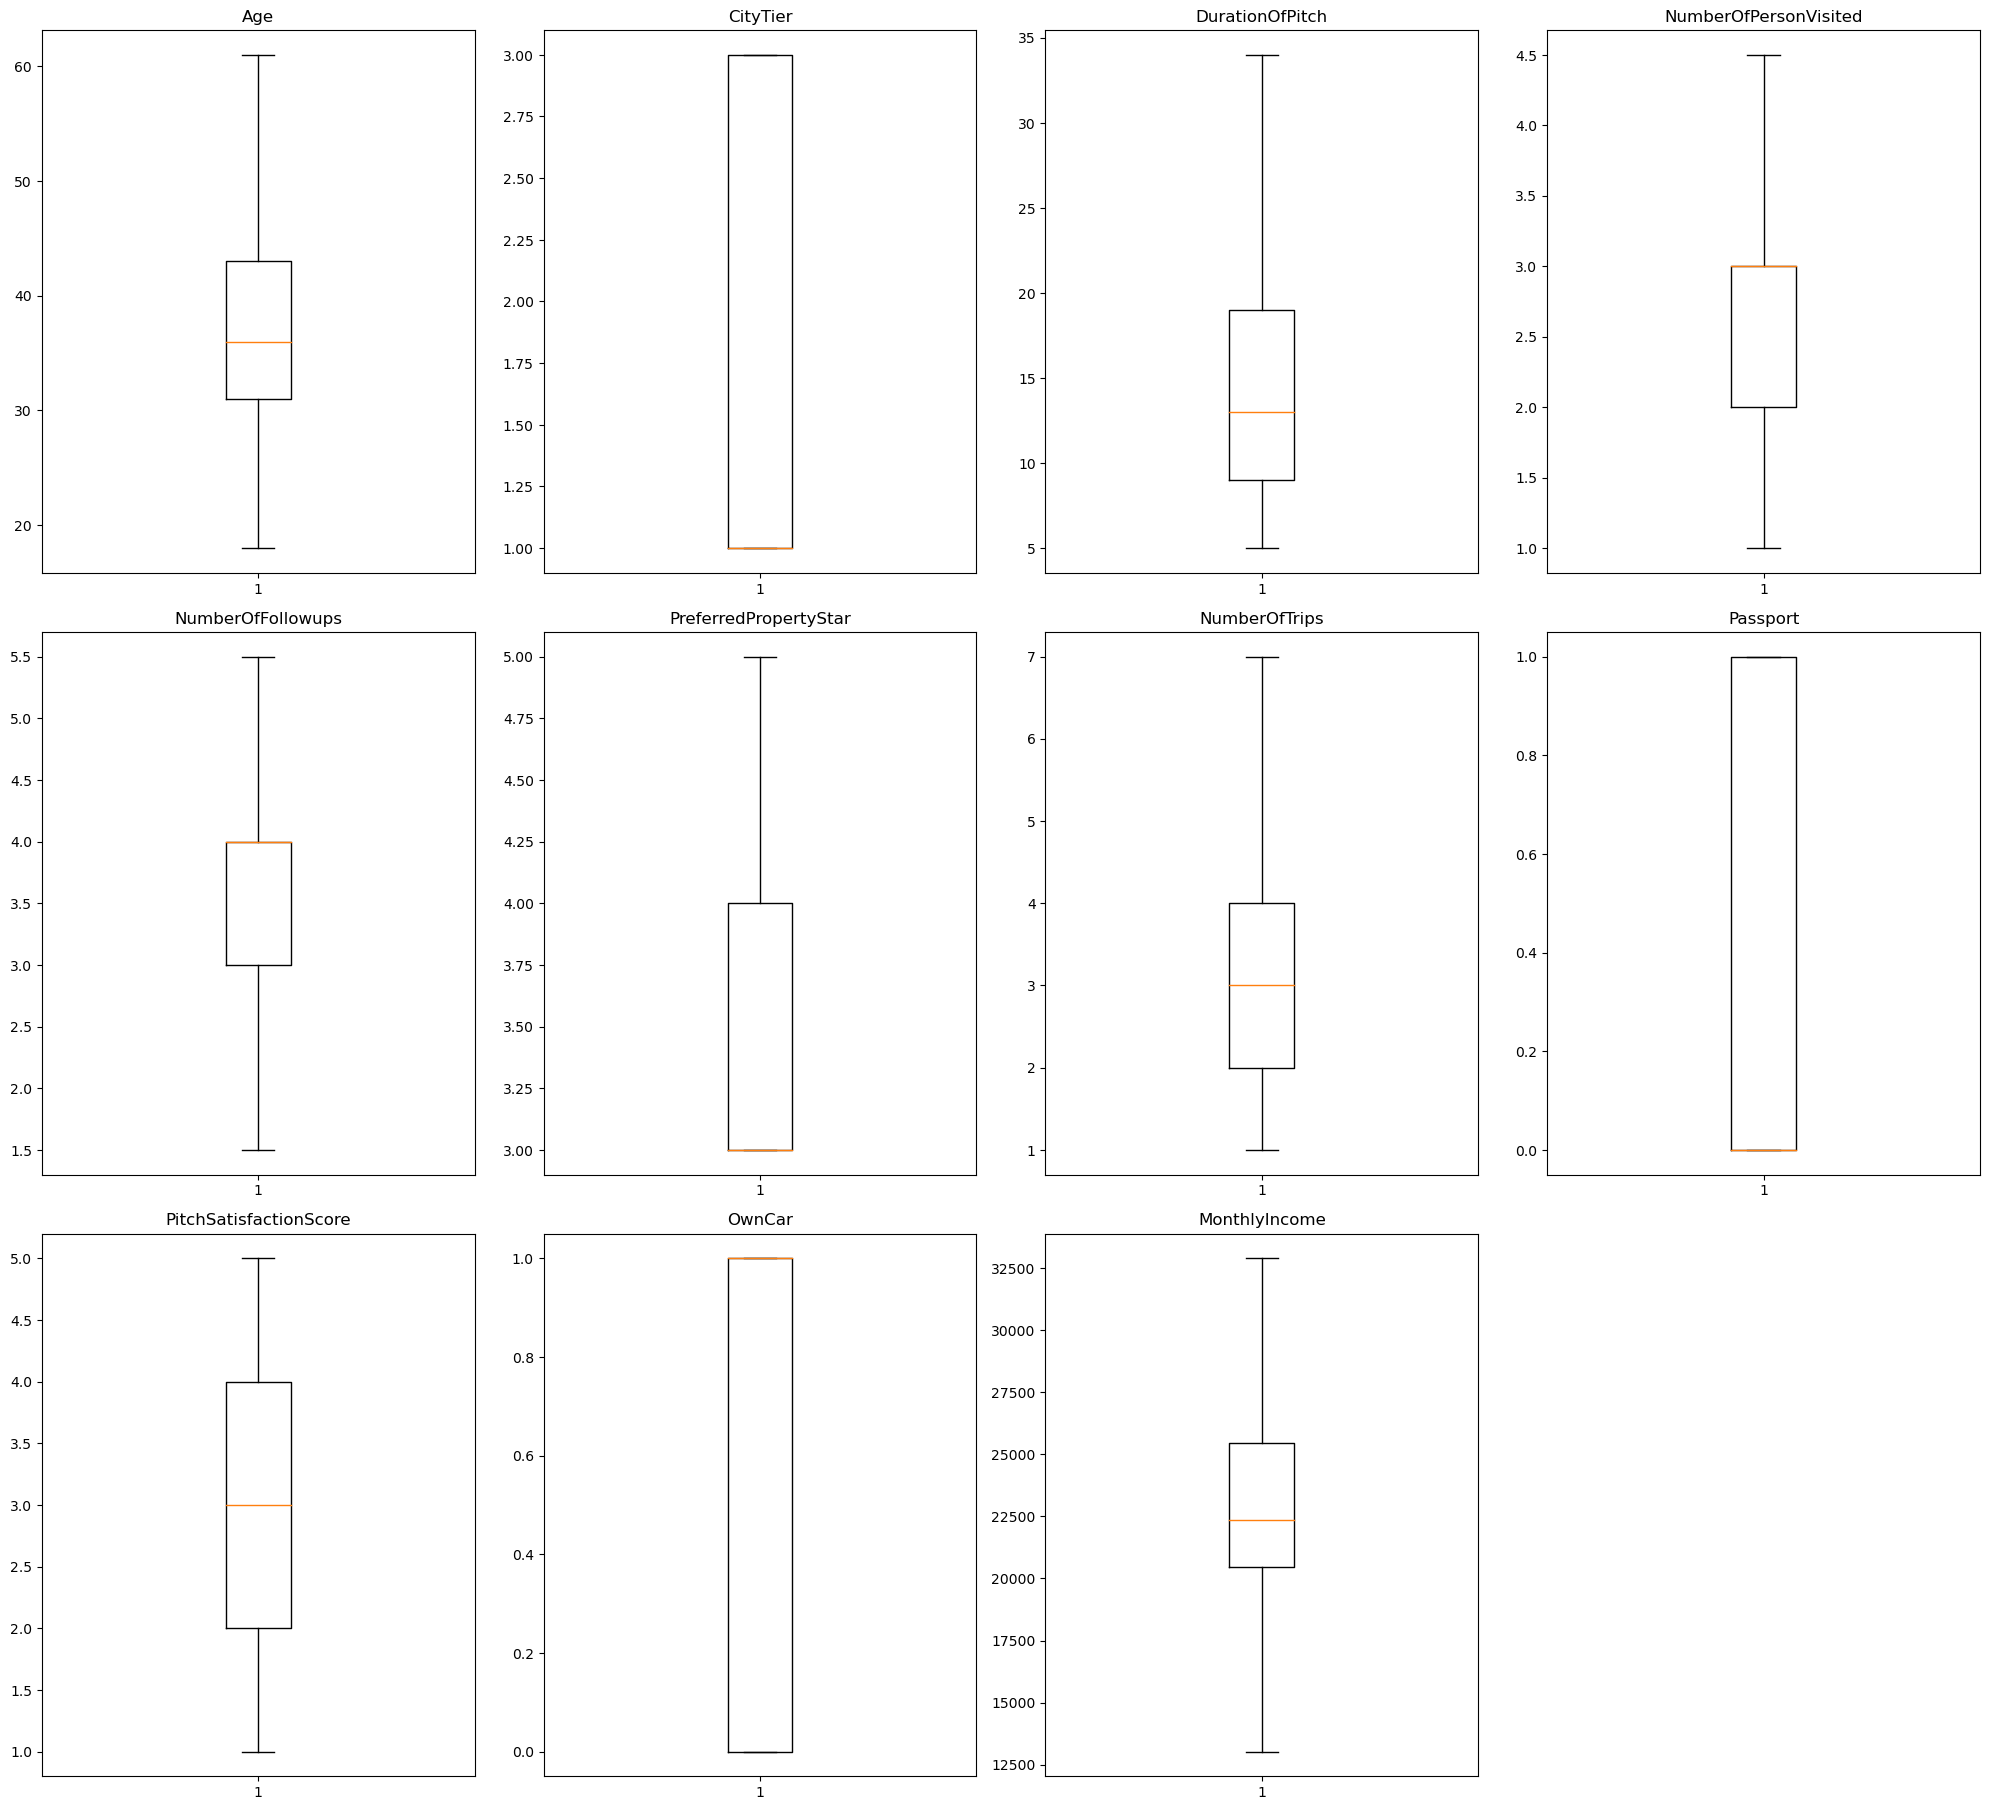

In [70]:
# Confirm the outliers have been removed
numerical_col = x.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(x[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [71]:
y.unique()

array([1, 0], dtype=int64)

# Data Modelling

In [72]:
#X= Independent feature & Y= Dependent feature: 
x = pd.get_dummies(x,drop_first=True)


In [73]:
x.head()

Age  CityTier  DurationOfPitch  NumberOfPersonVisited  NumberOfFollowups  \
0  41.0         3              6.0                    3.0                3.0   
1  49.0         1             14.0                    3.0                4.0   
2  37.0         1              8.0                    3.0                4.0   
3  33.0         1              9.0                    2.0                3.0   
4  36.0         1              8.0                    2.0                3.0   

   PreferredPropertyStar  NumberOfTrips  Passport  PitchSatisfactionScore  \
0                    3.0            1.0         1                       2   
1                    4.0            2.0         0                       3   
2                    3.0            7.0         1                       3   
3                    3.0            2.0         1                       5   
4                    4.0            1.0         0                       5   

   OwnCar  ...  ProductPitched_King  ProductPitched_Standard  \
0       1  ...                    0                        0   
1       1  ...                    0                        0   
2       0  ...                    0                        0   
3       1  ...                    0                        0   
4       1  ...                    0                        0   

   ProductPitched_Super Deluxe  MaritalStatus_Married  MaritalStatus_Single  \
0                            0                      0                     1   
1                            0                      0                     0   
2                            0                      0                     1   
3                            0                      0                     0   
4                            0                      0                     0   

   MaritalStatus_Unmarried  Designation_Executive  Designation_Manager  \
0                        0                      0                    1   
1                        0                      0                    1   
2                        0                      1                    0   
3                        0                      1                    0   
4                        0                      1                    0   

   Designation_Senior Manager  Designation_VP  
0                           0               0  
1                           0               0  
2                           0               0  
3                           0               0  
4                           0               0  

[5 rows x 27 columns]

In [74]:
# Splitting data into training and test set:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.3, random_state=1,stratify=y)
print(x_train.shape, x_test.shape)

(3404, 27) (1459, 27)


In [75]:
y.value_counts(1)

0    0.811433
1    0.188567
Name: ProdTaken, dtype: float64

# Feature Scaling

# Logistic Regression

In [76]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

In [77]:
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [78]:
from sklearn.metrics import accuracy_score,classification_report

# Metrics & Functions

In [79]:
## Function to create confusion matrix
def confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(x_test)
    con_mat =metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_con_mat = pd.DataFrame(con_mat, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                con_mat.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         con_mat.flatten()/np.sum(con_mat)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_con_mat, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [80]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[] 
    
     #Predicting on train and tests
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    
    #Accuracy of the model
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #F1 of the model
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    #AUC, ROC Curve of the model
    from sklearn.metrics import roc_auc_score
    auc_score = roc_auc_score(y_test, pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1,auc_score))
    
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Classification Report : ",classification_report(pred_test,y_test))
        print("Accuracy on training set : ",model.score(x_train,y_train))
        print("Accuracy on test set : ",model.score(x_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("f1 score on training set : ",metrics.f1_score(y_train,pred_train))
        print("f1 score on test set : ",metrics.f1_score(y_test,pred_test))
        print("AUC score of the model : ",metrics.roc_auc_score(y_test,pred_test))
        
    return score_list # returning the list with train and test scores

In [81]:
#Function to visualize AUC ROC Curve
def auc_roc(model,y_actual):
    y_predict = model.predict(x_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_actual, y_predict)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Model building - Logistic Regression,Bagging, Random Forest & Decision Tree

# 1. Bagging

# Build Decision Tree Model

In [82]:
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

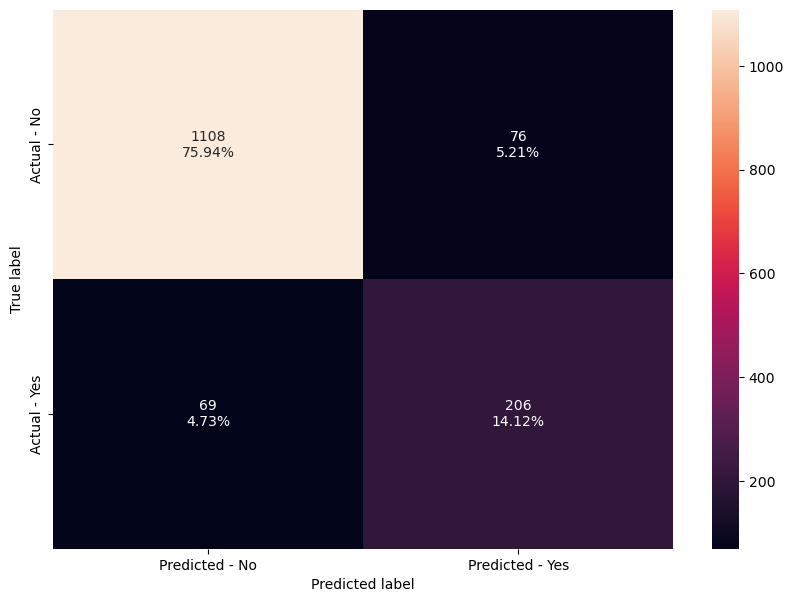

In [83]:
confusion_matrix(dtree_model,y_test)

Confusion Matrix -

* Customer takes the package and the model predicted the same : True Positive (observed=1,predicted=1)
* Customer didn't take package and the model predicted that customer has taken the package : False Positive (observed=0,predicted=1)
* Customer didn't take up package and the model predicted the same : True Negative (observed=0,predicted=0)
* Customer takes up package and the model predicted customer didn't take the package : False Negative (observed=1,predicted=0)

In [84]:
dtree_score=get_metrics_score(dtree_model)

Classification Report :                precision    recall  f1-score   support

           0       0.94      0.94      0.94      1177
           1       0.75      0.73      0.74       282

    accuracy                           0.90      1459
   macro avg       0.84      0.84      0.84      1459
weighted avg       0.90      0.90      0.90      1459

Accuracy on training set :  1.0
Accuracy on test set :  0.9006168608636053
Recall on training set :  1.0
Recall on test set :  0.7490909090909091
Precision on training set :  1.0
Precision on test set :  0.7304964539007093
f1 score on training set :  1.0
f1 score on test set :  0.7396768402154399
AUC score of the model :  0.84245085995086


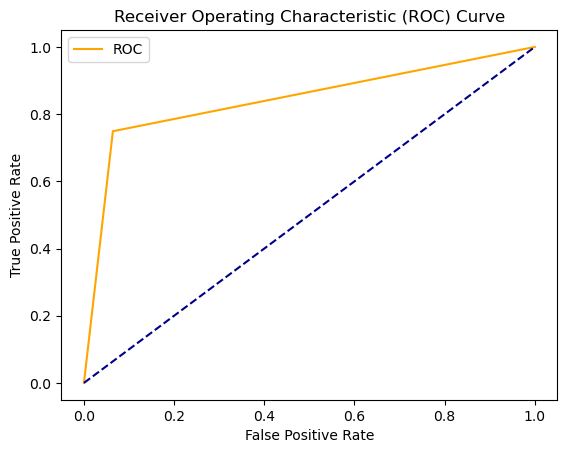

In [85]:
auc_roc(dtree_model,y_test)

Observations

* Decision tree is working well or biased towards the training data but is not able to generalize well on the test data.There is a overfitting condition.
* This is so as well for the f1 score (train data: 100% ; test data: 73.96%) but is improved compared to Logistic regression.

[Text(0.41346153846153844, 0.9166666666666666, 'X[7] <= 0.5\ngini = 0.306\nsamples = 3404\nvalue = [2762, 642]'),
 Text(0.1346153846153846, 0.75, 'X[0] <= 22.5\ngini = 0.219\nsamples = 2440\nvalue = [2135, 305]'),
 Text(0.038461538461538464, 0.5833333333333334, 'X[8] <= 2.5\ngini = 0.491\nsamples = 90\nvalue = [51, 39]'),
 Text(0.019230769230769232, 0.4166666666666667, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.057692307692307696, 0.4166666666666667, 'X[12] <= 0.5\ngini = 0.495\nsamples = 71\nvalue = [32, 39]'),
 Text(0.038461538461538464, 0.25, 'X[2] <= 7.5\ngini = 0.499\nsamples = 62\nvalue = [32, 30]'),
 Text(0.019230769230769232, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.057692307692307696, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.23076923076923078, 0.5833333333333334, 'X[5] <= 4.5\ngini = 0.201\nsamples = 2350\nvalue = [2084, 266]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[

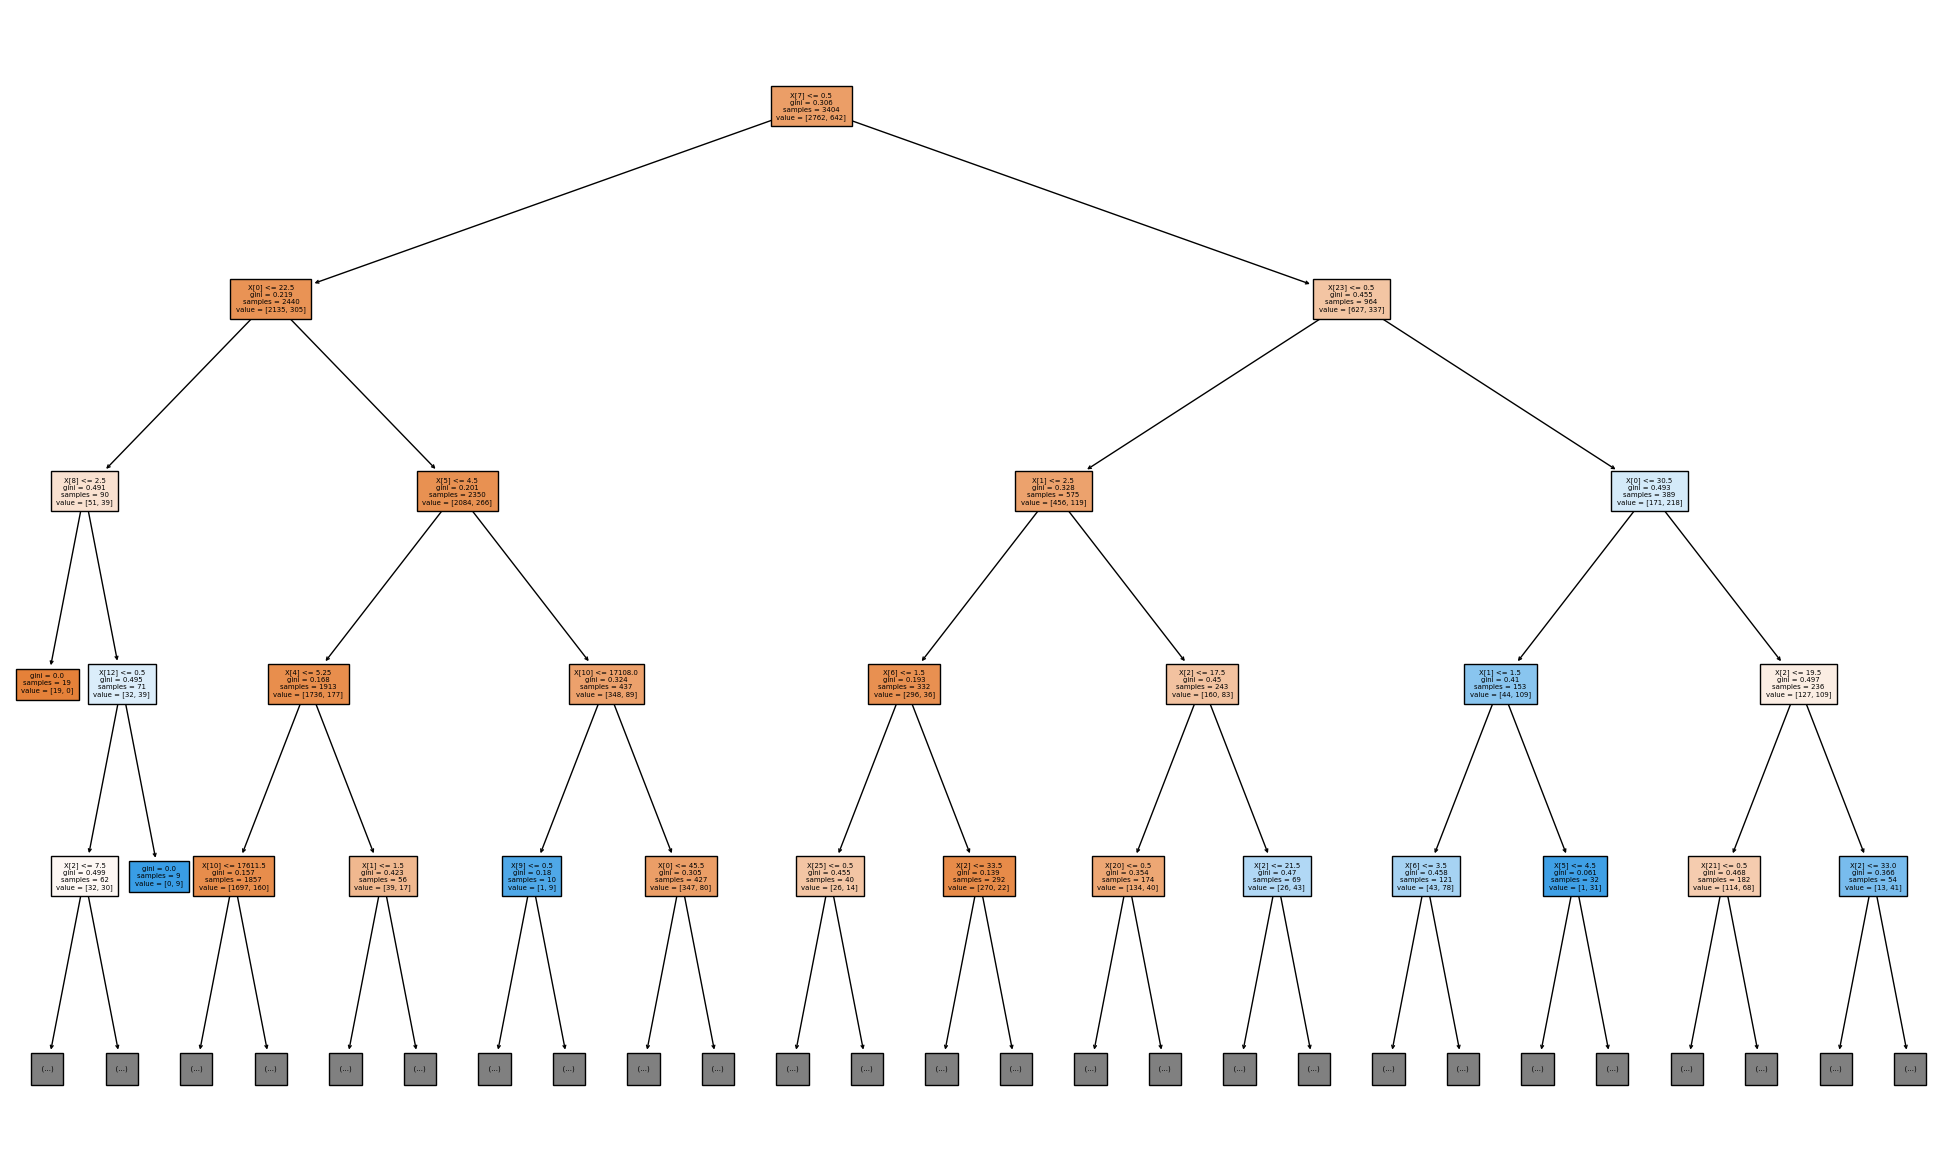

In [86]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(dtree_model, max_depth=4,filled=True,fontsize=5)

# Build Random Forest Classifier Model

In [87]:
from sklearn.ensemble import RandomForestClassifier
Rf_model=RandomForestClassifier()
Rf_model.fit(x_train,y_train)

RandomForestClassifier()

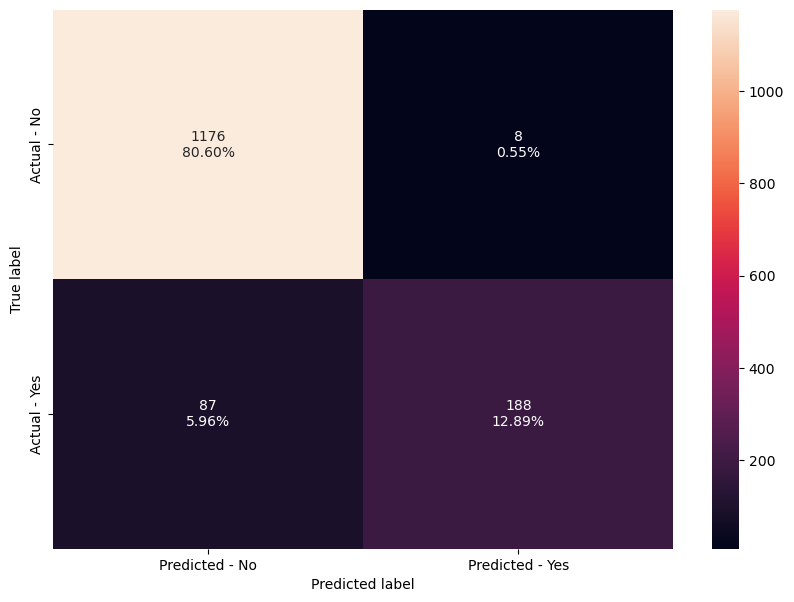

In [88]:
confusion_matrix(Rf_model,y_test)

In [89]:
rf_score=get_metrics_score(Rf_model)

Classification Report :                precision    recall  f1-score   support

           0       0.99      0.93      0.96      1263
           1       0.68      0.96      0.80       196

    accuracy                           0.93      1459
   macro avg       0.84      0.95      0.88      1459
weighted avg       0.95      0.93      0.94      1459

Accuracy on training set :  1.0
Accuracy on test set :  0.9348869088416724
Recall on training set :  1.0
Recall on test set :  0.6836363636363636
Precision on training set :  1.0
Precision on test set :  0.9591836734693877
f1 score on training set :  1.0
f1 score on test set :  0.7983014861995753
AUC score of the model :  0.8384398034398034


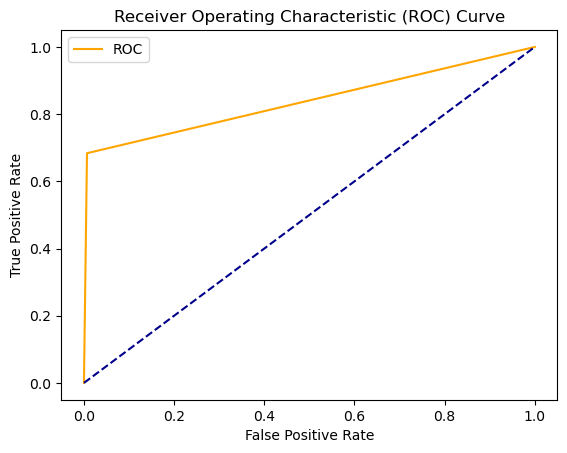

In [90]:
auc_roc(Rf_model,y_test)

Observations

Random Forest is working quiet well on the test data as F1 score has been improved compared to Decision tree (train data: 100% ; test data: 78.11%). but there is still overfitting condition.

# Build Bagging Classifier Model

In [91]:
#base_estimator for bagging classifier is a decision tree by default
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),random_state=42)
bagging_model.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  random_state=42)

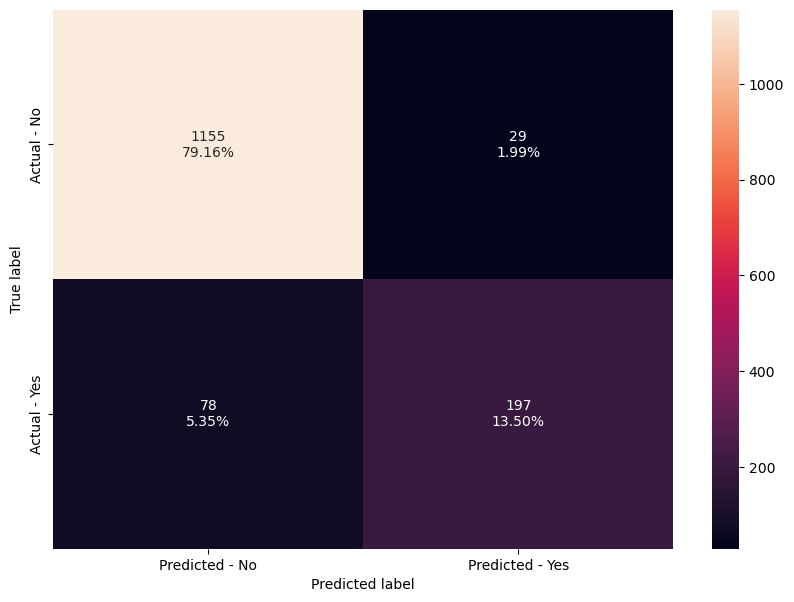

In [92]:
confusion_matrix(bagging_model,y_test)

In [93]:
bagging_score=get_metrics_score(bagging_model)

Classification Report :                precision    recall  f1-score   support

           0       0.98      0.94      0.96      1233
           1       0.72      0.87      0.79       226

    accuracy                           0.93      1459
   macro avg       0.85      0.90      0.87      1459
weighted avg       0.94      0.93      0.93      1459

Accuracy on training set :  0.9947121034077556
Accuracy on test set :  0.9266620973269363
Recall on training set :  0.9766355140186916
Recall on test set :  0.7163636363636363
Precision on training set :  0.9952380952380953
Precision on test set :  0.8716814159292036
f1 score on training set :  0.9858490566037736
f1 score on test set :  0.7864271457085829
AUC score of the model :  0.8459351965601967


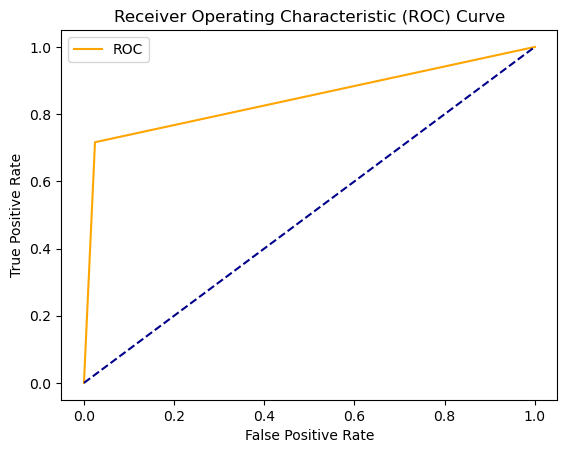

In [94]:
auc_roc(bagging_model,y_test)

Observations

* Bagging classifier is still overfitting on the training set and is not generalizing well on the test data.
* This is same for the f1 score too (train data: 98.58% ; test data: 78.6%).
* There is a slight improvement in the test score over the initial decision tree and random forest and Logistic regression.

# Build Naive Bayes Model

Gaussian Naive Bayes is a type of Naive Bayes classifier that follows the normal distribution.

In [95]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

GaussianNB()

Classification Report :                precision    recall  f1-score   support

           0       0.82      0.90      0.86      1073
           1       0.61      0.43      0.51       386

    accuracy                           0.78      1459
   macro avg       0.71      0.67      0.68      1459
weighted avg       0.76      0.78      0.76      1459

Accuracy on training set :  0.7623384253819037
Accuracy on test set :  0.7758738862234407
Recall on training set :  0.6074766355140186
Recall on test set :  0.6072727272727273
Precision on training set :  0.4118268215417107
Precision on test set :  0.4326424870466321
f1 score on training set :  0.49087476400251734
f1 score on test set :  0.5052950075642966
AUC score of the model :  0.7111532555282556


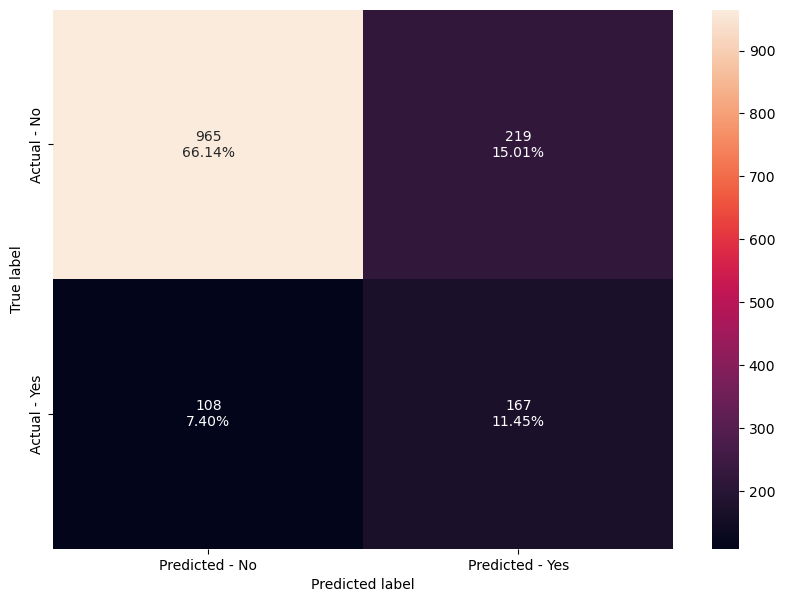

In [96]:
#Creating confusion matrix
confusion_matrix(gnb_model,y_test)

#Calculating different metrics
gnb_score = get_metrics_score(gnb_model)

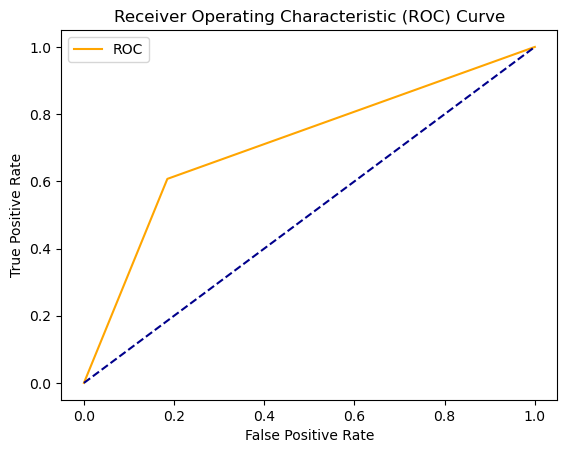

In [97]:
auc_roc(gnb_model,y_test)

Observations:

* Naive Bayes classifier is not overfitting the data and is working well for the model but the F1 scores are low (train data: 49.08% ; test data: 50.52%).

# Hyperparameter tunning of Models

# Decision Tree

In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
# Choose the type of classifier. 
from sklearn.model_selection import GridSearchCV
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81} ,random_state=42)

# Grid of parameters to choose from
parameters = { 
              'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score) # using highest f1_score to choose 

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=5,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=42)

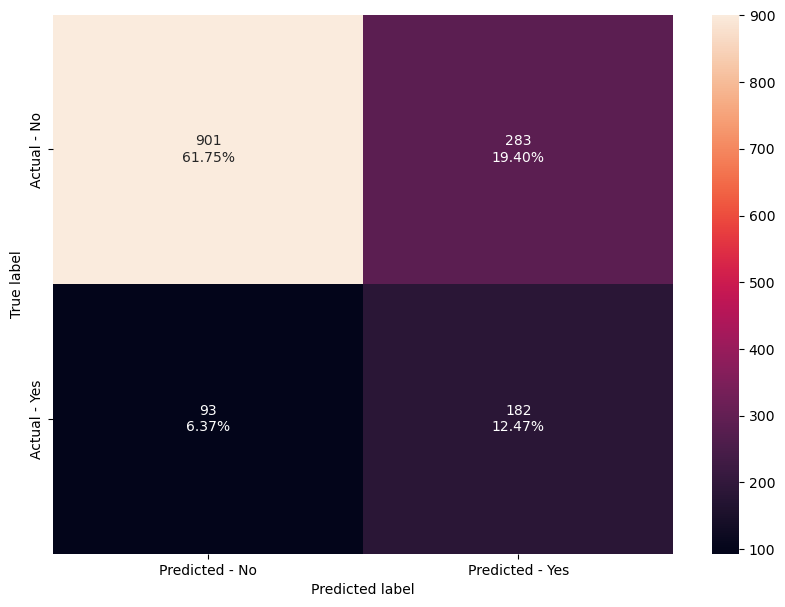

In [99]:
confusion_matrix(dtree_estimator,y_test)

In [100]:
dtree_estimator_score=get_metrics_score(dtree_estimator)

Classification Report :                precision    recall  f1-score   support

           0       0.76      0.91      0.83       994
           1       0.66      0.39      0.49       465

    accuracy                           0.74      1459
   macro avg       0.71      0.65      0.66      1459
weighted avg       0.73      0.74      0.72      1459

Accuracy on training set :  0.7561692126909518
Accuracy on test set :  0.7422892392049348
Recall on training set :  0.6869158878504673
Recall on test set :  0.6618181818181819
Precision on training set :  0.4121495327102804
Precision on test set :  0.3913978494623656
f1 score on training set :  0.5151869158878504
f1 score on test set :  0.491891891891892
AUC score of the model :  0.7113989557739557


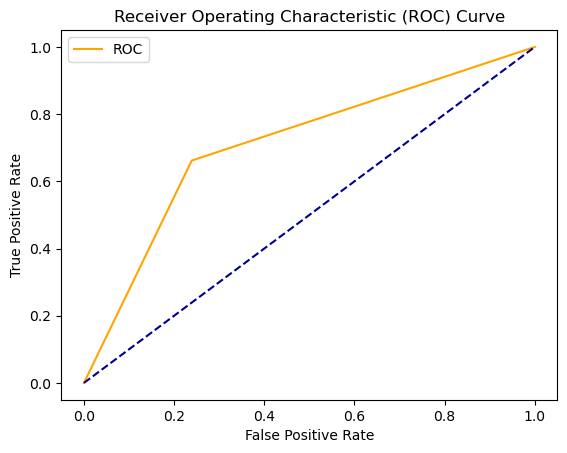

In [101]:
auc_roc(dtree_estimator,y_test)

Observations

* Overfitting in decision tree after tunning has reduced but scores have also reduced.
* F1 score has reduced (train data: 51.51% ; test data: 49.18%) but the scrore gap betwwen train and test dataset is less.

# Random Forest Classifier

In [102]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(class_weight={0:0.19,1:0.81},random_state=42)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [50,100,150],
        "min_samples_leaf": np.arange(5, 10),
        "max_features": np.arange(0.2, 0.7, 0.1),
        "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
rf_scorer = metrics.make_scorer(metrics.f1_score) # using highest f1_score to choose

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=rf_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81},
                       max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=50, random_state=42)

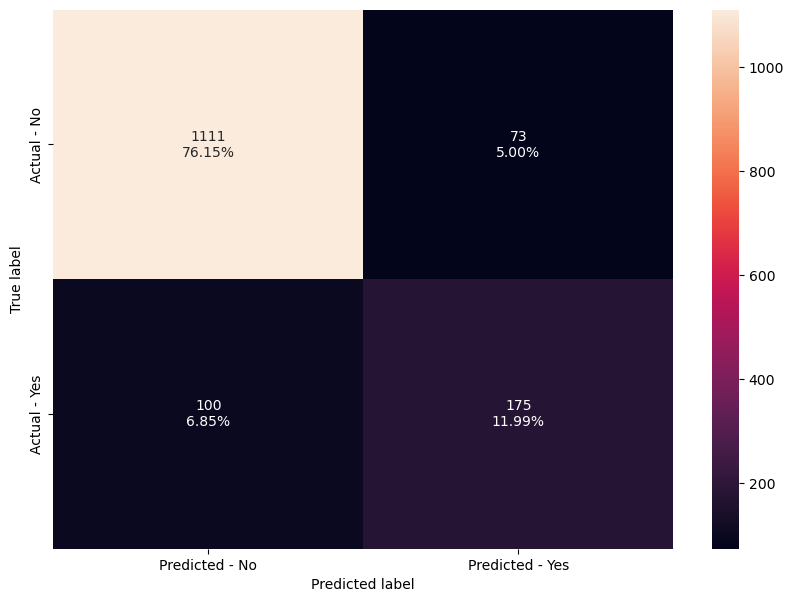

In [103]:
confusion_matrix(rf_estimator_tuned,y_test)

In [104]:
rf_estimator_score=get_metrics_score(rf_estimator_tuned)

Classification Report :                precision    recall  f1-score   support

           0       0.94      0.92      0.93      1211
           1       0.64      0.71      0.67       248

    accuracy                           0.88      1459
   macro avg       0.79      0.81      0.80      1459
weighted avg       0.89      0.88      0.88      1459

Accuracy on training set :  0.9336075205640423
Accuracy on test set :  0.8814256339958876
Recall on training set :  0.8722741433021807
Recall on test set :  0.6363636363636364
Precision on training set :  0.7954545454545454
Precision on test set :  0.7056451612903226
f1 score on training set :  0.8320950965824665
f1 score on test set :  0.6692160611854685
AUC score of the model :  0.7873541154791154


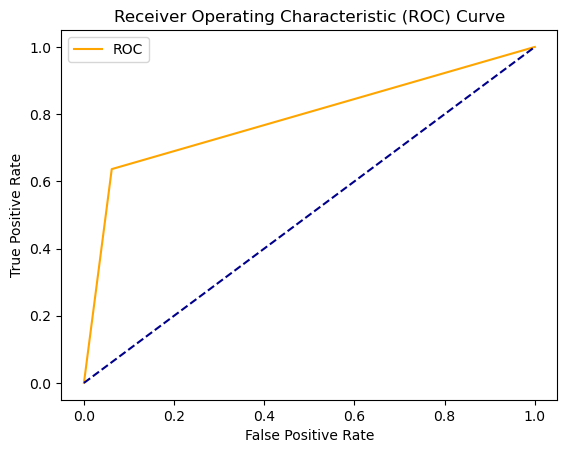

In [105]:
auc_roc(rf_estimator_tuned,y_test)

Observations : 

* Model is still overfitted.
* f1 score has improved comared to decision tree(train data: 83.20% ; test data: 66.92%)

# Bagging Classifier

base_estimator: Default base estimator is a decision tree.

In [106]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1),random_state=42)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
bagg_scorer = metrics.make_scorer(metrics.f1_score) # using highest f1_score to choose

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=bagg_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  max_features=0.9, max_samples=0.9, n_estimators=30,
                  random_state=42)

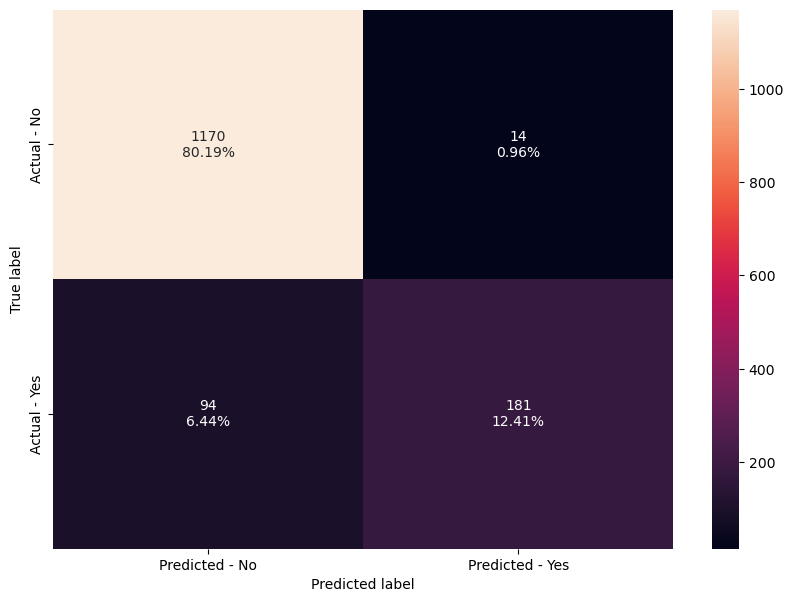

In [107]:
confusion_matrix(bagging_estimator_tuned,y_test)

In [108]:
dtree_estimator_score=get_metrics_score(bagging_estimator_tuned)

Classification Report :                precision    recall  f1-score   support

           0       0.99      0.93      0.96      1264
           1       0.66      0.93      0.77       195

    accuracy                           0.93      1459
   macro avg       0.82      0.93      0.86      1459
weighted avg       0.94      0.93      0.93      1459

Accuracy on training set :  0.9985311398354877
Accuracy on test set :  0.9259766963673749
Recall on training set :  0.9922118380062306
Recall on test set :  0.6581818181818182
Precision on training set :  1.0
Precision on test set :  0.9282051282051282
f1 score on training set :  0.9960906958561376
f1 score on test set :  0.7702127659574469
AUC score of the model :  0.8231787469287469


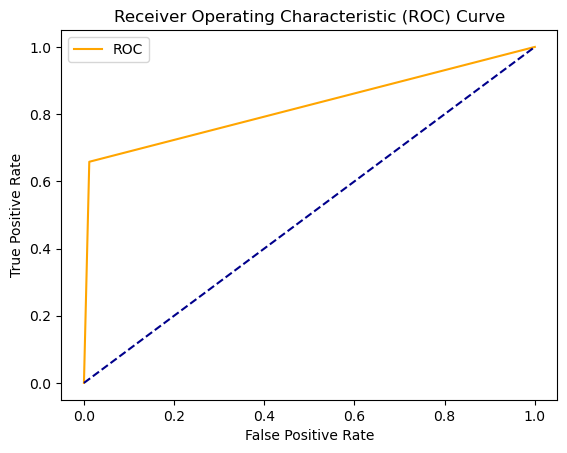

In [109]:
auc_roc(bagging_estimator_tuned,y_test)

Observations

* Bagging classifier tuned is still overfitting but less on the training set and performed a little better on the test data for precision.
* f1 score's of training and test set has improved (train data: 99.60% ; test data: 77.02%).
* Precision score of training and test set has improved a lot.

# Naive Bayes

In [110]:
# Choose the type of classifier. 
#gs_NB_estimator_tuned = GaussianNB(base_estimator=DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1),random_state=42)
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=500)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-8, num=200)}
gs_NB_tuned = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB_tuned.fit(x_train, y_train)

gs_NB_tuned.best_params_

Fitting 15 folds for each of 200 candidates, totalling 3000 fits


{'var_smoothing': 2.0970464013232307e-08}

In [111]:
GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

Classification Report :                precision    recall  f1-score   support

           0       0.99      0.84      0.91      1385
           1       0.21      0.80      0.34        74

    accuracy                           0.84      1459
   macro avg       0.60      0.82      0.62      1459
weighted avg       0.95      0.84      0.88      1459

Accuracy on training set :  0.8349001175088132
Accuracy on test set :  0.8416723783413297
Recall on training set :  0.2071651090342679
Recall on test set :  0.21454545454545454
Precision on training set :  0.7150537634408602
Precision on test set :  0.7972972972972973
f1 score on training set :  0.321256038647343
f1 score on test set :  0.33810888252148996
AUC score of the model :  0.6009382678132678


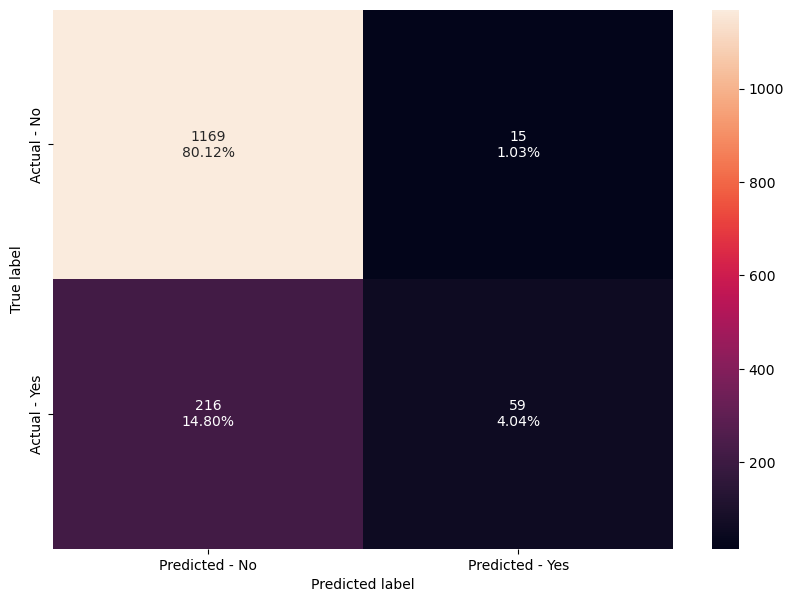

In [112]:
#Creating confusion matrix
confusion_matrix(gs_NB_tuned,y_test)

#Calculating different metrics
gnb_tuned_score = get_metrics_score(gs_NB_tuned)

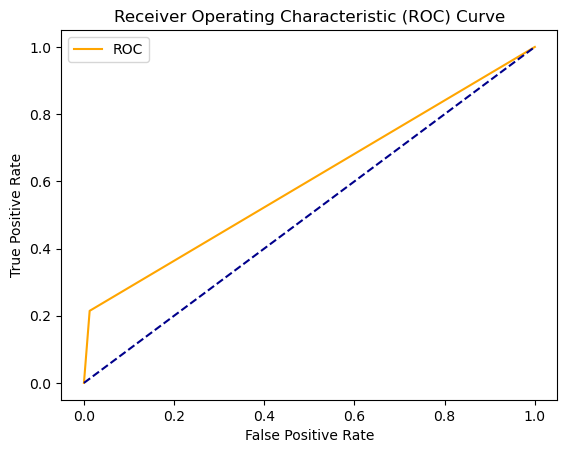

In [113]:
auc_roc(gs_NB_tuned,y_test)

Observation:
    
   * The score has reduced after tunning the Naive Bayes model but accuracy and precision has improved compared to the 
    model before tunning
   * There is no overfitting condition as well.

# Boosting

# Build AdaBoost Classifier Model

Classification Report :                precision    recall  f1-score   support

           0       0.97      0.87      0.92      1316
           1       0.38      0.73      0.50       143

    accuracy                           0.86      1459
   macro avg       0.67      0.80      0.71      1459
weighted avg       0.91      0.86      0.87      1459

Accuracy on training set :  0.8510575793184488
Accuracy on test set :  0.8560657984921178
Recall on training set :  0.35202492211838005
Recall on test set :  0.3781818181818182
Precision on training set :  0.7129337539432177
Precision on test set :  0.7272727272727273
f1 score on training set :  0.47132429614181437
f1 score on test set :  0.49760765550239233
AUC score of the model :  0.6726213144963146


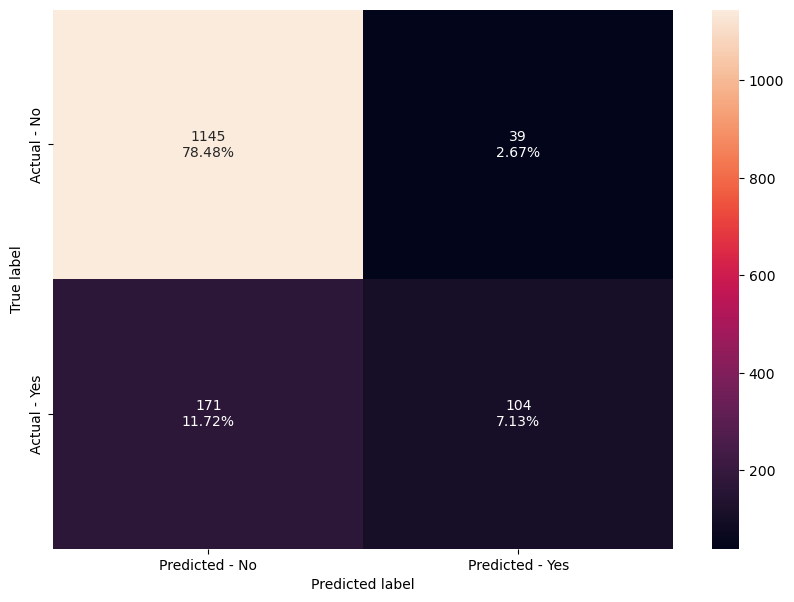

In [114]:
#Fitting the model
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
adb_classifier = AdaBoostClassifier(random_state=42)
adb_classifier.fit(x_train,y_train)

#Calculating different metrics
get_metrics_score(adb_classifier)

#Creating confusion matrix
confusion_matrix(adb_classifier,y_test)

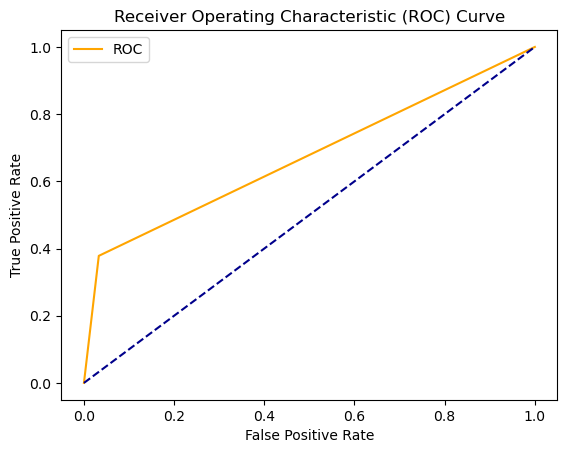

In [115]:
auc_roc(adb_classifier,y_test)

Observations:

* Adaboost is not giving overfitting condition than previous models but the test f1-score is low.
* F1 score is at (train data: 47.13% ; test data: 49.76%).

# Hyperparameter Tuning

In [116]:
# Choose the type of classifier. 
adb_tuned = AdaBoostClassifier(random_state=42)

parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}


adb_scorer = metrics.make_scorer(metrics.f1_score)


grid_obj = GridSearchCV(adb_tuned, parameters, scoring=adb_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
adb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
adb_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.3000000000000003, n_estimators=90,
                   random_state=42)

Classification Report :                precision    recall  f1-score   support

           0       0.95      0.92      0.93      1218
           1       0.65      0.74      0.69       241

    accuracy                           0.89      1459
   macro avg       0.80      0.83      0.81      1459
weighted avg       0.90      0.89      0.89      1459

Accuracy on training set :  0.9894242068155111
Accuracy on test set :  0.8917066483893078
Recall on training set :  0.9548286604361371
Recall on test set :  0.6509090909090909
Precision on training set :  0.9887096774193549
Precision on test set :  0.7427385892116183
f1 score on training set :  0.971473851030111
f1 score on test set :  0.6937984496124031
AUC score of the model :  0.799272113022113


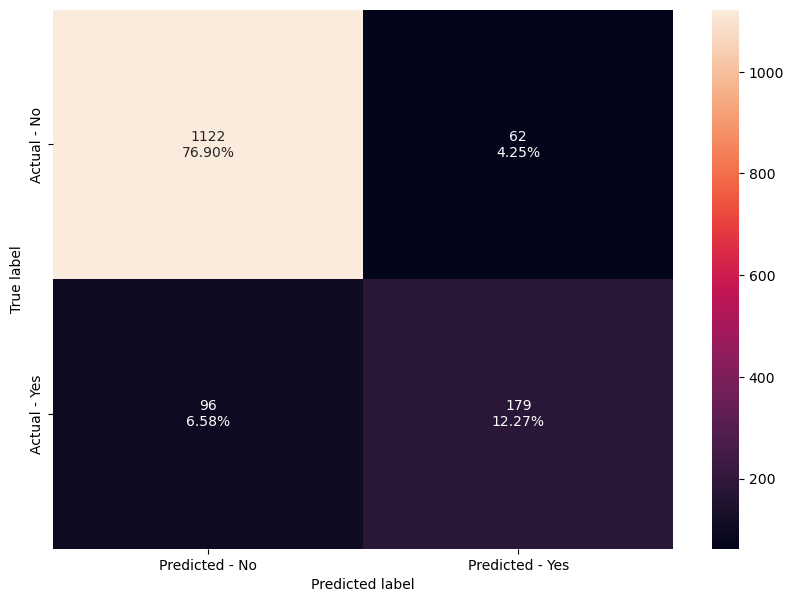

In [117]:
#Calculating different metrics
get_metrics_score(adb_tuned)

#Creating confusion matrix
confusion_matrix(adb_tuned,y_test)

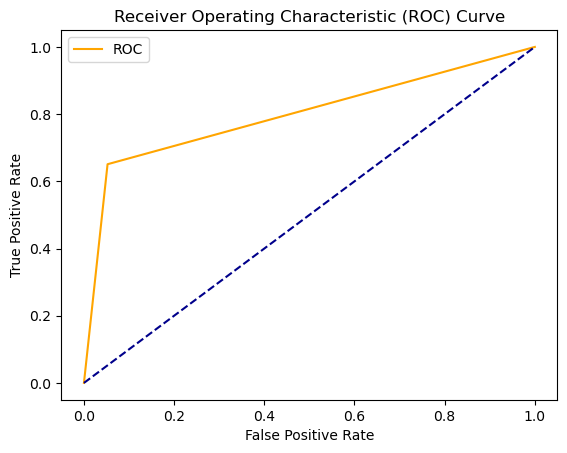

In [118]:
auc_roc(adb_tuned,y_test)

Observations

* The tuned AdaBoost model performance has improved alot but the model has started to overfit the training data.
* F1 score is at (train data: 97.14% ; test data: 69.37%).

# Gradient Boosting Classifier Model

In [119]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

Classification Report :                precision    recall  f1-score   support

           0       0.98      0.88      0.93      1316
           1       0.43      0.83      0.56       143

    accuracy                           0.88      1459
   macro avg       0.70      0.85      0.75      1459
weighted avg       0.92      0.88      0.89      1459

Accuracy on training set :  0.8842538190364277
Accuracy on test set :  0.8752570253598355
Recall on training set :  0.46261682242990654
Recall on test set :  0.4290909090909091
Precision on training set :  0.8583815028901735
Precision on test set :  0.8251748251748252
f1 score on training set :  0.6012145748987854
f1 score on test set :  0.5645933014354068
AUC score of the model :  0.7039880221130221


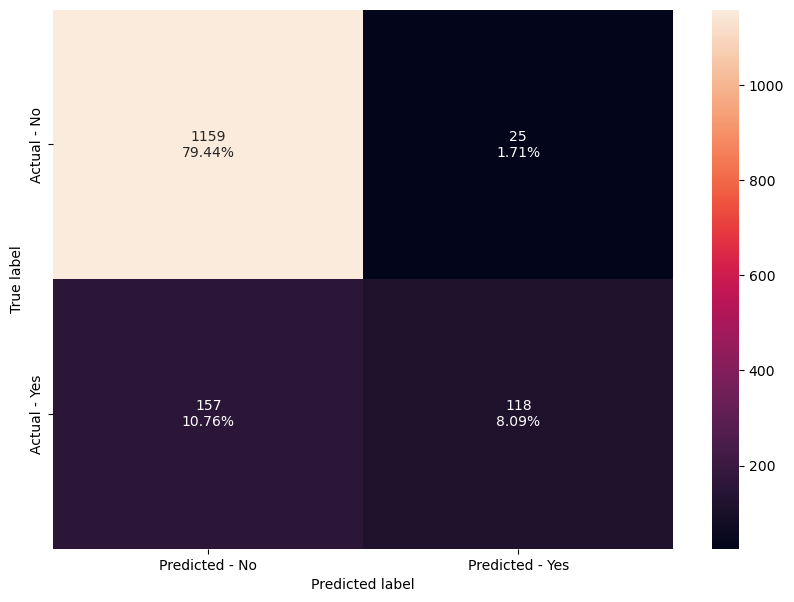

In [120]:
#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
confusion_matrix(gb_classifier,y_test)

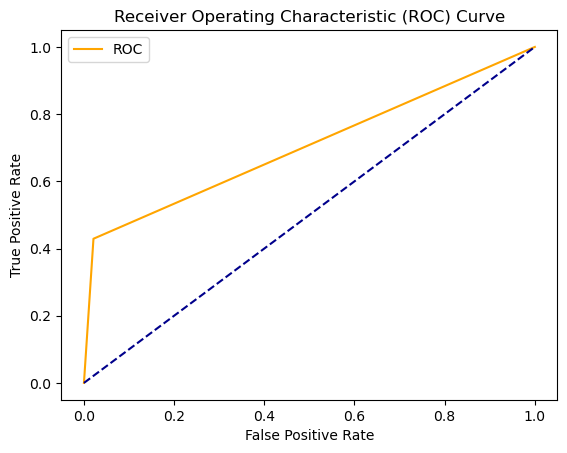

In [121]:
auc_roc(gb_classifier,y_test)

Observations

* The Gradient Boosting model does not overfit as much but some of the test recall and f1 score are low.
* F1 score is at (train data: 60.12% ; test data: 56.45%).

# Hyperparameter Tuning

In [122]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=42)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
gbc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=gbc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=42,
                           subsample=0.8)

Classification Report :                precision    recall  f1-score   support

           0       0.97      0.90      0.93      1286
           1       0.51      0.82      0.63       173

    accuracy                           0.89      1459
   macro avg       0.74      0.86      0.78      1459
weighted avg       0.92      0.89      0.90      1459

Accuracy on training set :  0.9200940070505288
Accuracy on test set :  0.886223440712817
Recall on training set :  0.6261682242990654
Recall on test set :  0.5127272727272727
Precision on training set :  0.9262672811059908
Precision on test set :  0.815028901734104
f1 score on training set :  0.7472118959107806
f1 score on test set :  0.6294642857142856
AUC score of the model :  0.7428501228501229


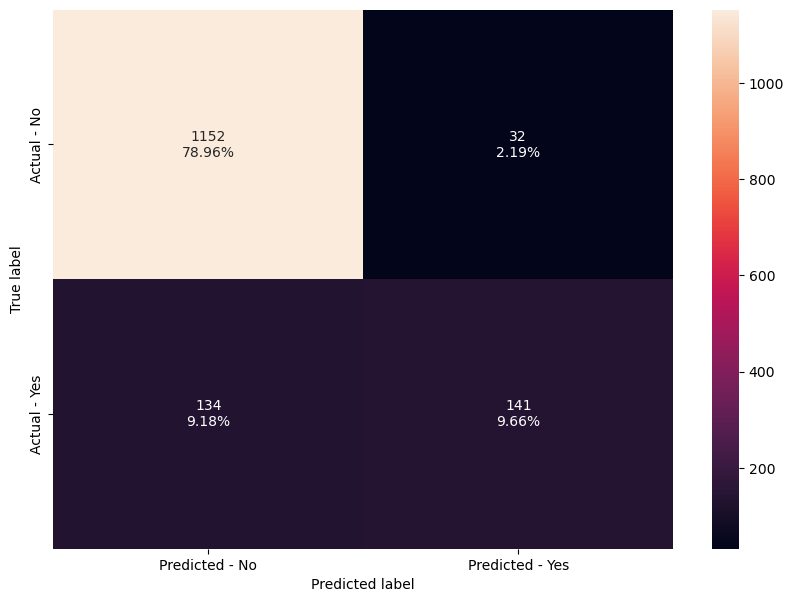

In [123]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
confusion_matrix(gbc_tuned,y_test)

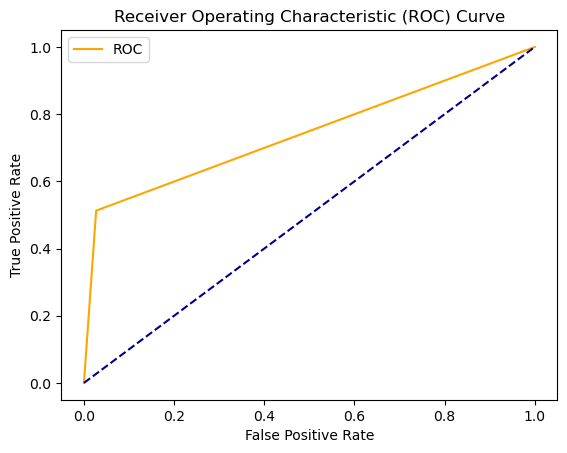

In [124]:
auc_roc(gbc_tuned,y_test)


Observations

* The tuned Gradient Boosting model does not overfit so much and all test data metrics improved but it can improve more.
* F1 score is at (train data: 74.72% ; test data: 62.94%).

# XGBoost Classifier Model

In [125]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor

Classification Report :                precision    recall  f1-score   support

           0       0.99      0.94      0.96      1235
           1       0.75      0.92      0.83       224

    accuracy                           0.94      1459
   macro avg       0.87      0.93      0.90      1459
weighted avg       0.95      0.94      0.94      1459

Accuracy on training set :  0.999412455934195
Accuracy on test set :  0.9417409184372858
Recall on training set :  0.9968847352024922
Recall on test set :  0.7527272727272727
Precision on training set :  1.0
Precision on test set :  0.9241071428571429
f1 score on training set :  0.9984399375975038
f1 score on test set :  0.8296593186372745
AUC score of the model :  0.8691845823095823


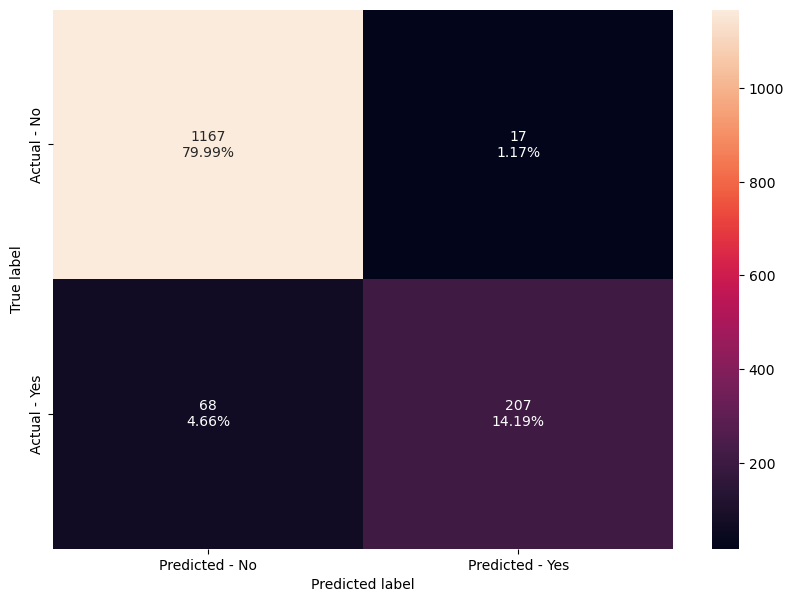

In [126]:
#Fitting the model
import xgboost as xgb
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(x_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
confusion_matrix(xgb_classifier,y_test)

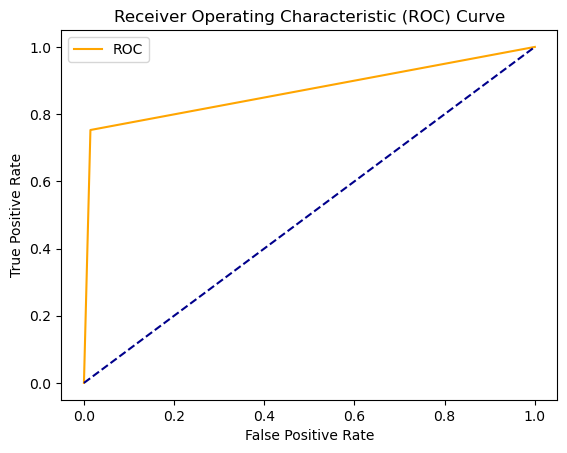

In [127]:
auc_roc(xgb_classifier,y_test)

Observations

* The XGB model is starting to overfit and all test data metrics have improved significantly.
* F1 score is at (train data: 99.8% ; test data: 82.96%).

# Hyperparameter Tuning

In [128]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
xgb_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=xgb_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

Classification Report :                precision    recall  f1-score   support

           0       0.91      0.95      0.93      1125
           1       0.81      0.67      0.73       334

    accuracy                           0.89      1459
   macro avg       0.86      0.81      0.83      1459
weighted avg       0.88      0.89      0.88      1459

Accuracy on training set :  0.9709165687426558
Accuracy on test set :  0.888279643591501
Recall on training set :  0.9875389408099688
Recall on test set :  0.8109090909090909
Precision on training set :  0.8744827586206897
Precision on test set :  0.6676646706586826
f1 score on training set :  0.9275786393562545
f1 score on test set :  0.7323481116584565
AUC score of the model :  0.8585795454545455


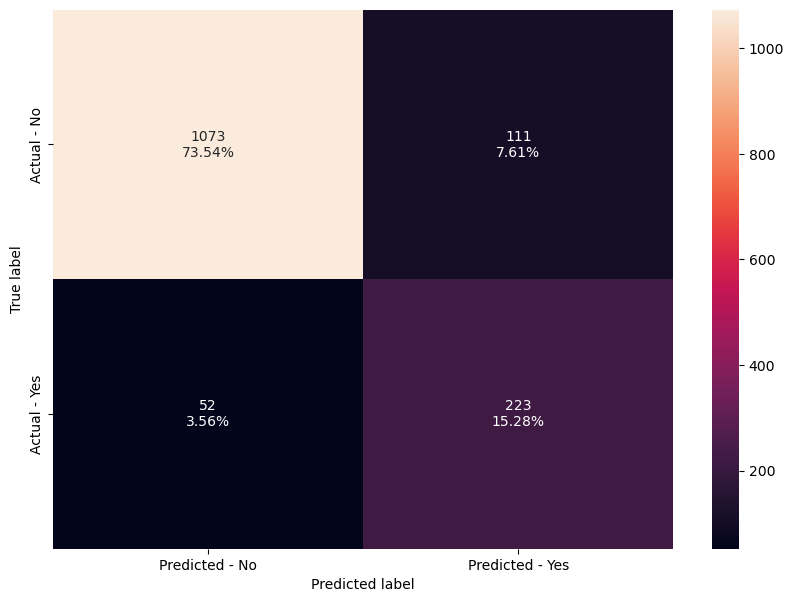

In [129]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
confusion_matrix(xgb_tuned,y_test)

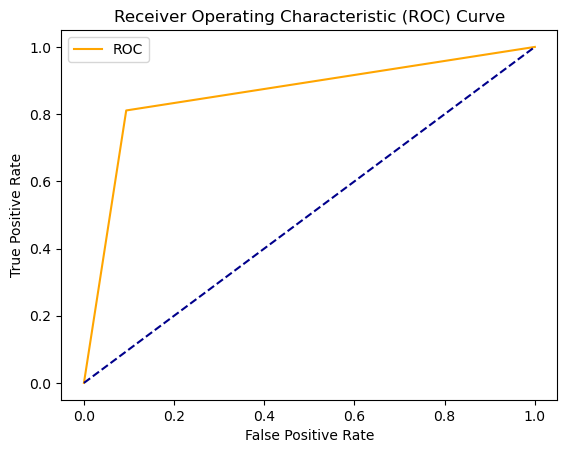

In [130]:
auc_roc(xgb_tuned,y_test)

Observations

* The tuned XGBoost model has generalized the test data better but the scroes have reduced after tunning.
* F1 score is at (train data: 92.7% ; test data: 73.23%).

# Stacking

Stacking is a way of ensembling classification or regression models it consists of two-layer estimators. The first layer consists of all the baseline models that are used to predict the outputs on the test datasets.

In [131]:
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingClassifier

In [132]:
estimators = [('Bagging classifier',bagging_estimator_tuned), ('Adaboost Boosting',adb_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators =estimators, final_estimator = xgb_tuned)

In [133]:
stacking_classifier=stacking_classifier.fit(x_train,y_train) 

Classification Report :                precision    recall  f1-score   support

           0       0.91      0.97      0.94      1104
           1       0.90      0.70      0.78       355

    accuracy                           0.91      1459
   macro avg       0.90      0.84      0.86      1459
weighted avg       0.91      0.91      0.90      1459

Accuracy on training set :  0.9926556991774383
Accuracy on test set :  0.9067854694996573
Recall on training set :  1.0
Recall on test set :  0.8981818181818182
Precision on training set :  0.9625187406296851
Precision on test set :  0.6957746478873239
f1 score on training set :  0.9809014514896868
f1 score on test set :  0.7841269841269841
AUC score of the model :  0.903482800982801


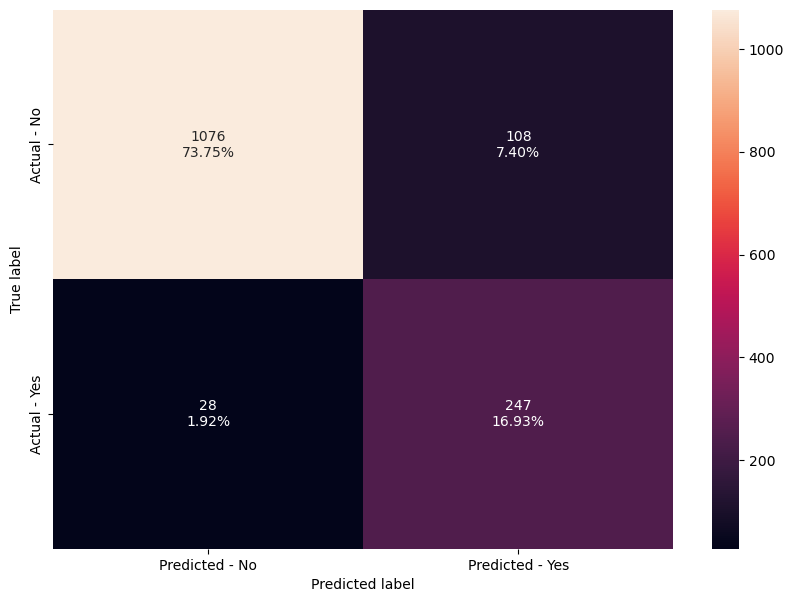

In [134]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
confusion_matrix(stacking_classifier,y_test)

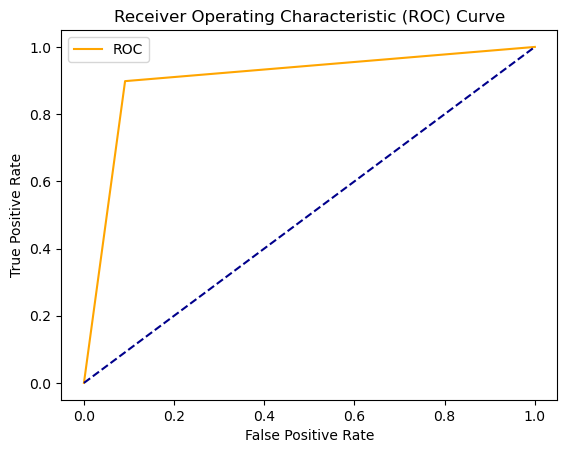

In [135]:
auc_roc(stacking_classifier,y_test)

Observations

* There is lot of improvement in the metrics score compared to xgboost tunning.
* F1 score is at (train data: 98.09% ; test data: 78.41%).

# Comparing all models

In [136]:
# defining list of models
models = [dtree_model, dtree_estimator,Rf_model, rf_estimator_tuned, bagging_model, bagging_estimator_tuned,gnb_model, gs_NB_tuned, 
          adb_classifier, adb_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []
ROC_score = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
    ROC_score.append(j[8])

In [137]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Tuned Bagging Classifier','Naive Bayes',
                                          'Naive Bayed Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test, 'ROC_score':ROC_score}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
12                  XGBoost Classifier        0.999412       0.941741   
2                        Random Forest        1.000000       0.934887   
4                   Bagging Classifier        0.994712       0.926662   
14                 Stacking Classifier        0.992656       0.906785   
5             Tuned Bagging Classifier        0.998531       0.925977   
0                        Decision Tree        1.000000       0.900617   
13            Tuned XGBoost Classifier        0.970917       0.888280   
9            Tuned AdaBoost Classifier        0.989424       0.891707   
3                  Tuned Random Forest        0.933608       0.881426   
11  Tuned Gradient Boosting Classifier        0.920094       0.886223   
10        Gradient Boosting Classifier        0.884254       0.875257   
6                          Naive Bayes        0.762338       0.775874   
8                  AdaBoost Classifier        0.851058       0.856066   
1                  Tuned Decision Tree        0.756169       0.742289   
7                    Naive Bayed Tuned        0.834900       0.841672   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
12      0.996885     0.752727         1.000000        0.924107   
2       1.000000     0.683636         1.000000        0.959184   
4       0.976636     0.716364         0.995238        0.871681   
14      1.000000     0.898182         0.962519        0.695775   
5       0.992212     0.658182         1.000000        0.928205   
0       1.000000     0.749091         1.000000        0.730496   
13      0.987539     0.810909         0.874483        0.667665   
9       0.954829     0.650909         0.988710        0.742739   
3       0.872274     0.636364         0.795455        0.705645   
11      0.626168     0.512727         0.926267        0.815029   
10      0.462617     0.429091         0.858382        0.825175   
6       0.607477     0.607273         0.411827        0.432642   
8       0.352025     0.378182         0.712934        0.727273   
1       0.686916     0.661818         0.412150        0.391398   
7       0.207165     0.214545         0.715054        0.797297   

    Train_F1-Score  Test_F1-Score  ROC_score  
12        0.998440       0.829659   0.869185  
2         1.000000       0.798301   0.838440  
4         0.985849       0.786427   0.845935  
14        0.980901       0.784127   0.903483  
5         0.996091       0.770213   0.823179  
0         1.000000       0.739677   0.842451  
13        0.927579       0.732348   0.858580  
9         0.971474       0.693798   0.799272  
3         0.832095       0.669216   0.787354  
11        0.747212       0.629464   0.742850  
10        0.601215       0.564593   0.703988  
6         0.490875       0.505295   0.711153  
8         0.471324       0.497608   0.672621  
1         0.515187       0.491892   0.711399  
7         0.321256       0.338109   0.600938

Observations

* The models are tending towards overfitting f1-scores are low.
* As per our findings,XGBoost Classifier should be the model to press ahead as it scored the highest test f1-score.
* XGBoost Classifier has also one of the lowest gap between training and test f1-score of the dataset among all models.

# Feature Importance of Tuned XGBoost Model

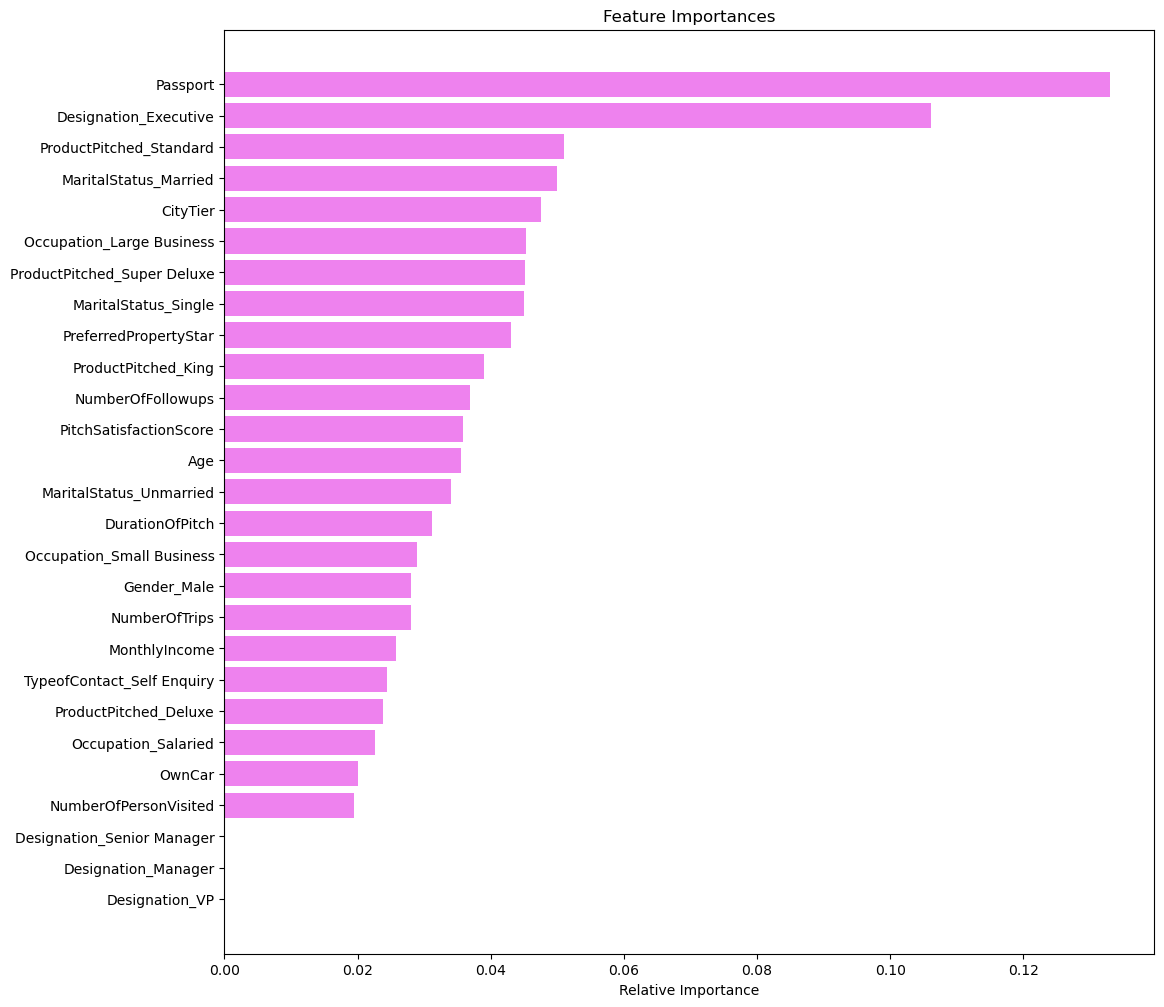

In [138]:
feature_names = x_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observations

In the tuned XGBoost model, Passport(Yes) is the most important feature followed by features - Designation(Executive) and ProductPitched_Standard.

# Business Insights

* Based on the performances of the different models, XGBoost Classifier performed the best using f1_score as the deciding factor due the lower score gap between training and testing data.
* Most important variable as per XGBoost are ‘Passport’, ‘Designation’ and ‘ProductPitched_Standard’.
* Passport holders, Executive level and Married customers are more likely to accept a package deal.
* However, the current customer base has 70.8% Non-Passport holders and only 18.8% of customers are single compared to 47.8% are married.
* So we can come one with new marketing idea's or advertisment to attract the single persons and can encourage non passport holders.
* We can give discounts or coupens to existing or regular customer's to retain or increase the frequency of traveling and to attract more customers holding passport.
* Currently, the Executive level customers dominated the share of customers at 37.5% and more can be done to increase the number.


* Comments on additional data sources for model improvement

* Additional data can be gathers from the people who are enquiring but not taking the package, they can be asked to fill a feedback survey asking for why they will not select the package from that we will get insight and further analysis to build a strong model or improvements can be done.


* The model implemented will help to undestand specially on which cutomers to be focused more and where we need better ideas to be implemented instead of applying the same methodology to all customers. This will increase revenue and reduce marketing costs.


* Other Recommendations – From EDA

* Around 40.3% female are taking trips which is lower compare to men taking trips, this may be due to many reasons so we could look into it to attract more females by arranging feedback surveys or female group trips.
* 61.7% people are using 3 start property so 4 and 5 star hotel can come up with some marketing strategy to attract more customers.




* More expansion is needed among Tier 2 residents as well as Tier 3 customer base now at 30.7% only.
* More expansion is needed on Large business customers now at 8.9% of our customer base.
* Sales teams should be briefed to at least have 3 follow-ups with potential customers.
* The new package has to have similar features to Basic, Standard and Deluxe packages and marketed in 3 star or 5 star hotel combinations.
* Further investigation on unusual high number of rating 1.0 to help improve sales conversion.
* Super Deluxe package performs poorly and it should require a relook at its features and discontinued if needed. The new travel package should not have similar features to Super Deluxe package.